<div style="border:5px solid black; padding:5px;">
    <h1>ETAPE 1</h1>
    <p>Etudes Préliminaires </p>
    </div>


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import time
from tabulate import tabulate
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

warnings.filterwarnings('ignore')


---


In [3]:
def lire_csv(PATH, delimiter=',', encoding='utf-8'):
      try:
        data = pd.read_csv(PATH, delimiter=delimiter, encoding=encoding)
        print(f"Fichier '{PATH}' lu avec succès.")
        return data  
      except Exception as e:
        print(f"Erreur lors de la lecture du fichier '{PATH}': {e}")

chemin_fichier = "Data.csv"
# Call the function and store the result in 'data'
data = lire_csv(chemin_fichier)



Fichier 'Data.csv' lu avec succès.


-----

In [4]:
data.head() 

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

------

In [5]:
# nom de feature comme list
col = data.columns    # .columns  nous donne le nom de colonne sur Le jeux de Données
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


-----

In [6]:
# Vérifier les valeurs nulles dans chaque colonne
null_values = data.isnull().sum()
print(null_values)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

---


In [7]:
#label =y
#features = x
label = data.diagnosis 
list = ['Unnamed: 32','id','diagnosis']
features = data.drop(list,axis = 1 )

In [8]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

------

In [9]:
label.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

------

In [10]:
features.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

------

# Analyse de Data (Resultat)

In [11]:
B, M = label.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  357
Number of Malignant :  212


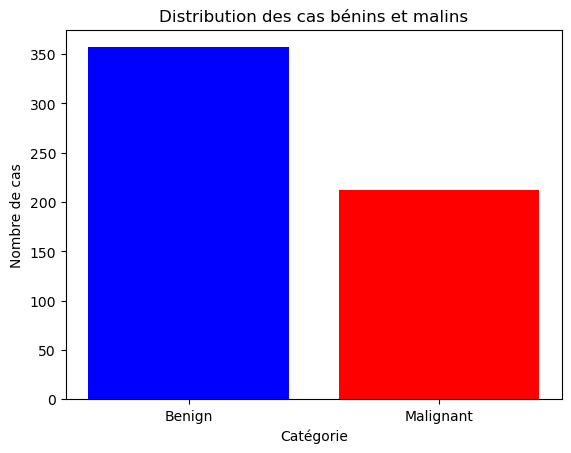

In [12]:
# Données à tracer
categories = ['Benign', 'Malignant']
counts = [B, M]
# Création de diagramme à barres
plt.bar(categories, counts, color=['blue', 'red'])
plt.xlabel('Catégorie')
plt.ylabel('Nombre de cas')
plt.title('Distribution des cas bénins et malins')
plt.show()

In [13]:
# Calculer les pourcentages
total_cases = B + M
pourcentage_B = (B / total_cases) * 100
pourcentage_M = (M / total_cases) * 100
print (pourcentage_B)
print (pourcentage_M)

62.741652021089635
37.258347978910365


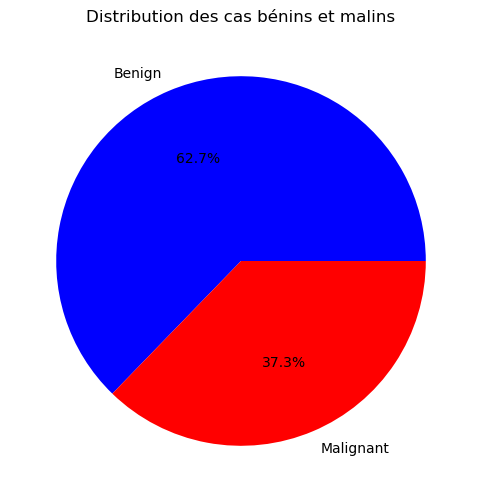

In [14]:
# Données à tracer
categories = ['Benign', 'Malignant']
counts = [B, M]
pourcentages = [pourcentage_B, pourcentage_M]
#  diagramme circulaire
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Distribution des cas bénins et malins')
plt.show()

-----

# Analyse Features (Variables) + Graphique

In [15]:
#label =y
#features = x
#data : rassemble tout les donnees

In [16]:
features.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [17]:
label.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [18]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

--------

In [19]:
# Fonction pour standardiser les données
def standarliser(data):
    # Calculer la moyenne et l'écart-type pour chaque colonne
    means = data.mean()
    stds = data.std()

    # Appliquer la standardisation: (x - moyenne) / écart-type
    data_standarliser = (data - means) / stds
    
    return data_standarliser

# Appliquer la fonction de standardisation
features_std = standarliser(features)

# Afficher les premières lignes des données standardisées
features_std.head()


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.096100     -2.071512        1.268817   0.983510         1.567087   
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.280628        2.650542             2.530249       2.215566   
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.253764  ...      1.885031      -1.358098         2.301575   
1               -0.867889  ...      1.804340      -0.368879         1.533776   
2               -0.397658  ...      1.510541      -0.023953         1.346291   
3                4.906602  ...     -0.281217       0.133866        -0.249720   
4               -0.561956  ...      1.297434      -1.465481         1.337363   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    1.999478          1.306537           2.614365         2.107672   
1    1.888827         -0.375282          -0.430066        -0.146620   
2    1.455004          0.526944           1.081980         0.854222   
3   -0.549538          3.391291           3.889975         1.987839   
4    1.219651          0.220362          -0.313119         0.612640   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.294058        2.748204                 1.935312  
1              1.086129       -0.243675                 0.280943  
2              1.953282        1.151242                 0.201214  
3              2.173873        6.040726                 4.930672  
4              0.728618       -0.867590                -0.396751  

[5 rows x 30 columns]

In [20]:
#label =y
#features = x
#data : rassemble tout les donnees
#featyres_std

-------

# Répresentation des Features 

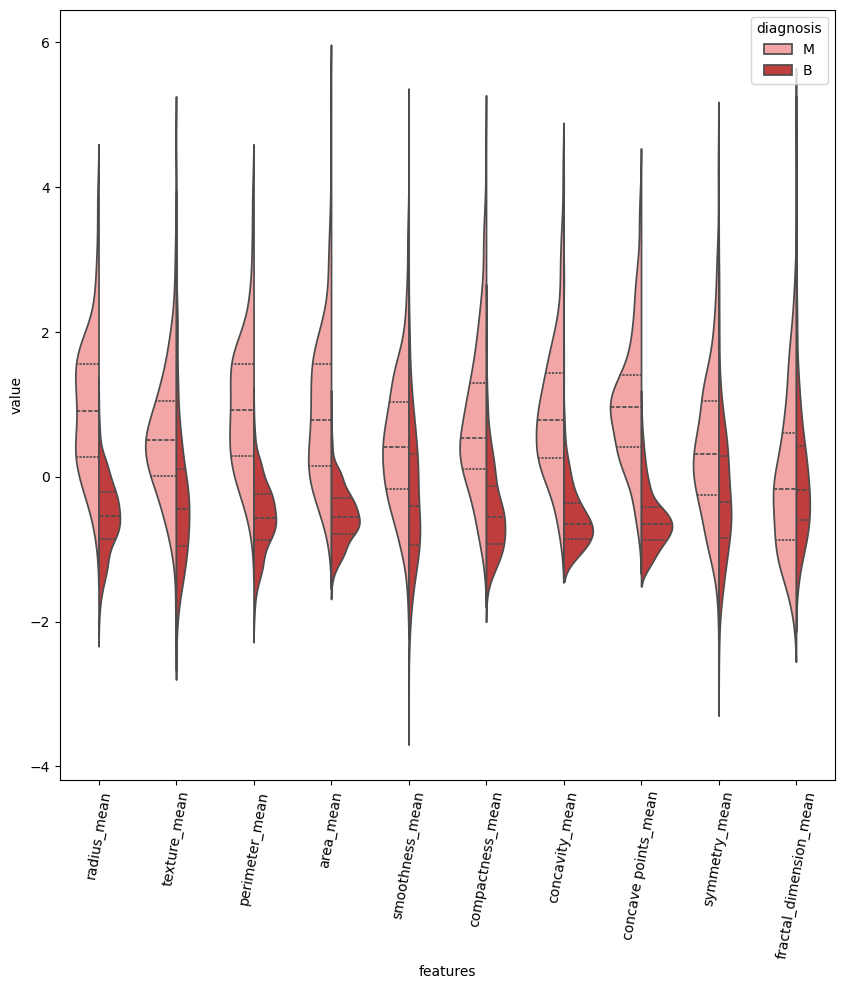

In [21]:
# Concaténation des labels et des features standardisées
data_std = pd.concat([label, features_std.iloc[:,0:10]], axis=1)
# Fondre le DataFrame pour la visualisation
data_melted = pd.melt(data_std, id_vars="diagnosis", var_name="features", value_name='value')
# Palette de couleurs personnalisée
palette_contrast = {"M": "#ff9999", "B": "#d62728"}  # Ajustez les couleurs si nécessaire
# Création du diagramme en violon
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_melted, split=True, inner="quart", palette=palette_contrast)
plt.xticks(rotation=80)  # Ajustez la rotation si nécessaire
plt.show()


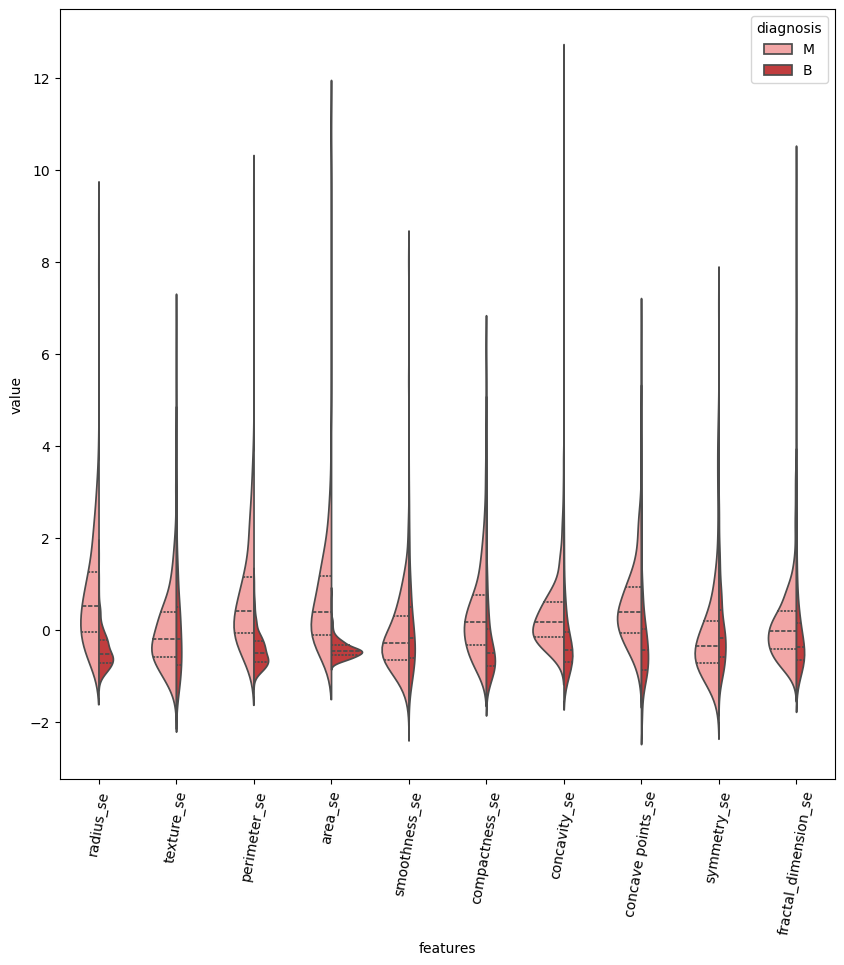

In [22]:
# Concaténation des labels et des features standardisées
data_std = pd.concat([label, features_std.iloc[:,10:20]], axis=1)
# Fondre le DataFrame pour la visualisation
data_melted = pd.melt(data_std, id_vars="diagnosis", var_name="features", value_name='value')
# Palette de couleurs personnalisée
palette_contrast = {"M": "#ff9999", "B": "#d62728"}  # Ajustez les couleurs si nécessaire
# Création du diagramme en violon
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_melted, split=True, inner="quart", palette=palette_contrast)
plt.xticks(rotation=80)  # Ajustez la rotation si nécessaire
plt.show()

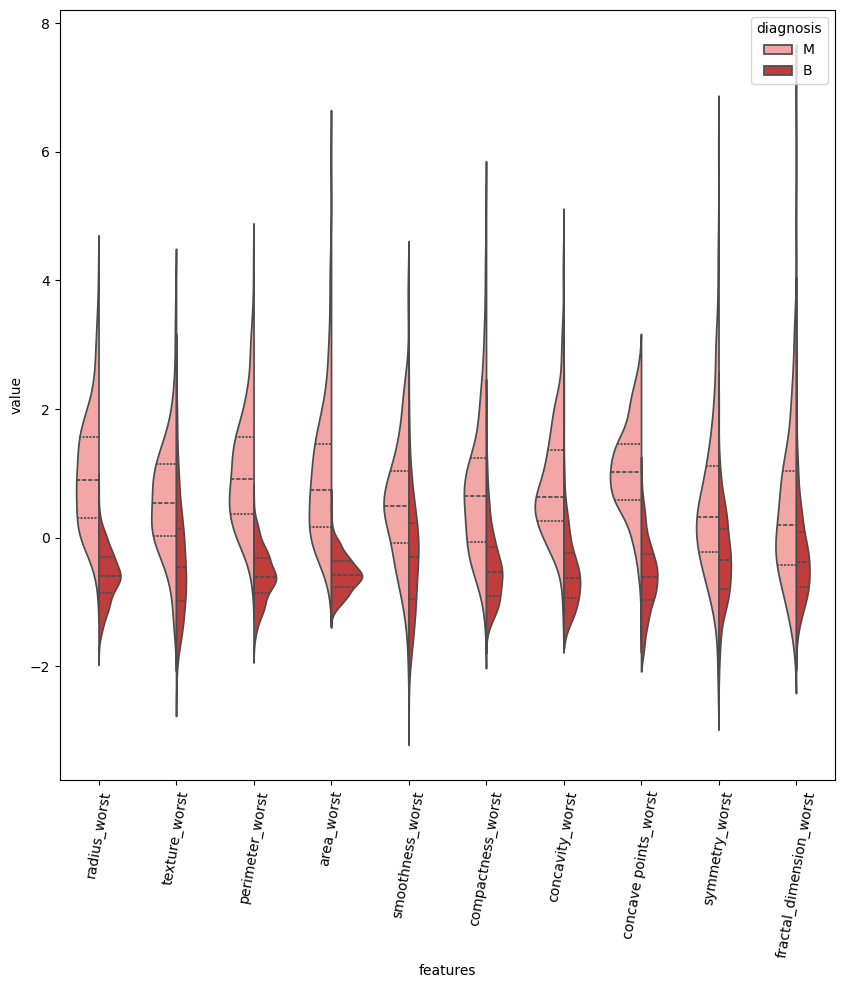

In [23]:
# Concaténation des labels et des features standardisées
data_std = pd.concat([label, features_std.iloc[:,20:30]], axis=1)
# Fondre le DataFrame pour la visualisation
data_melted = pd.melt(data_std, id_vars="diagnosis", var_name="features", value_name='value')
# Palette de couleurs personnalisée
palette_contrast = {"M": "#ff9999", "B": "#d62728"}  # Ajustez les couleurs si nécessaire
# Création du diagramme en violon
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_melted, split=True, inner="quart", palette=palette_contrast)
plt.xticks(rotation=80)  # Ajustez la rotation si nécessaire
plt.show()

In [24]:
data_std.head()

diagnosis  radius_worst  texture_worst  perimeter_worst  area_worst  \
0         M      1.885031      -1.358098         2.301575    1.999478   
1         M      1.804340      -0.368879         1.533776    1.888827   
2         M      1.510541      -0.023953         1.346291    1.455004   
3         M     -0.281217       0.133866        -0.249720   -0.549538   
4         M      1.297434      -1.465481         1.337363    1.219651   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          1.306537           2.614365         2.107672              2.294058   
1         -0.375282          -0.430066        -0.146620              1.086129   
2          0.526944           1.081980         0.854222              1.953282   
3          3.391291           3.889975         1.987839              2.173873   
4          0.220362          -0.313119         0.612640              0.728618   

   symmetry_worst  fractal_dimension_worst  
0        2.748204                 1.935312  
1       -0.243675                 0.280943  
2        1.151242                 0.201214  
3        6.040726                 4.930672  
4       -0.867590                -0.396751

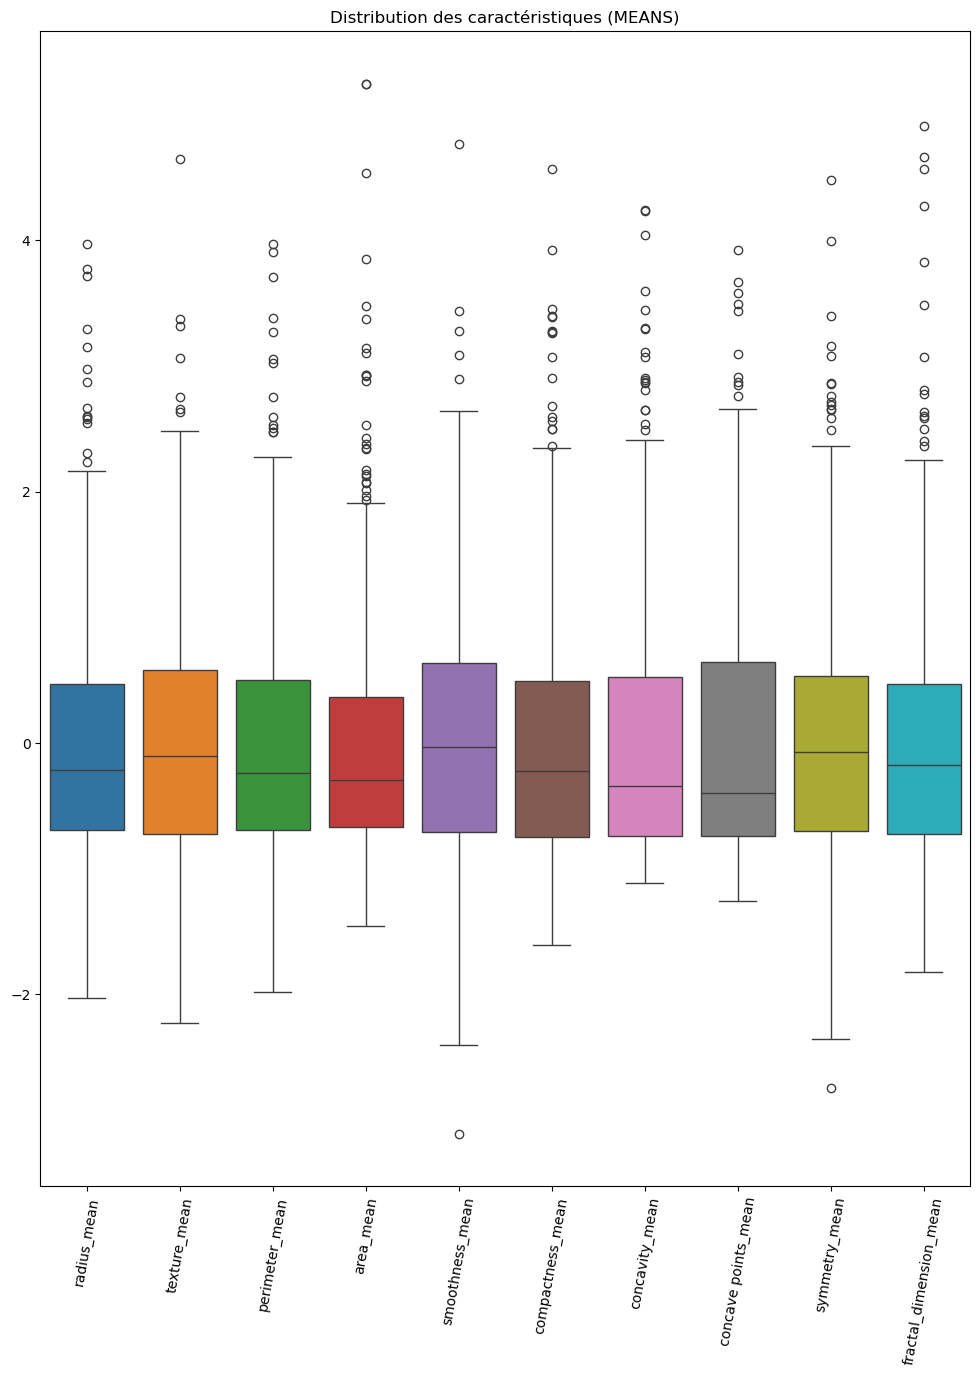

In [25]:
data_std = pd.concat([label, features_std.iloc[:,0:10]], axis=1)
plt.figure(figsize=(12, 15))  # taille de la figure
sns.boxplot(data=data_std.drop('diagnosis', axis=1))  # Exclut la colonne 'diagnosis' des données à tracer
plt.title('Distribution des caractéristiques (MEANS)')  # titre
plt.xticks(rotation=80)  # étiquettes de l'axe x 
plt.show()

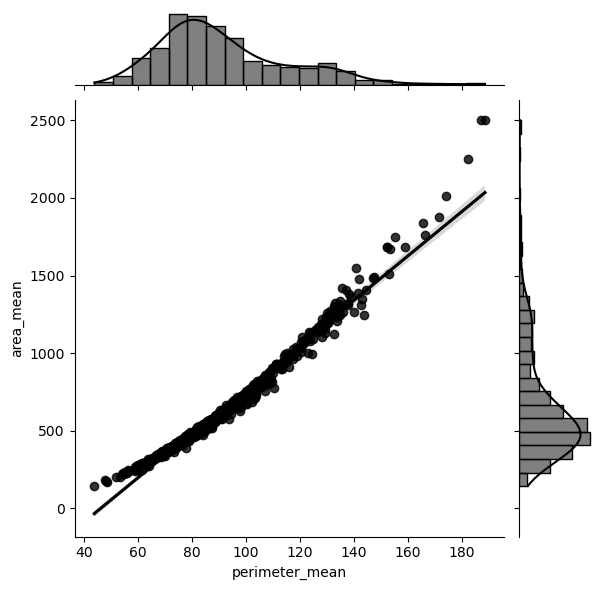

In [26]:
sns.jointplot(x='perimeter_mean', y='area_mean', data=features, kind="reg", color="black")

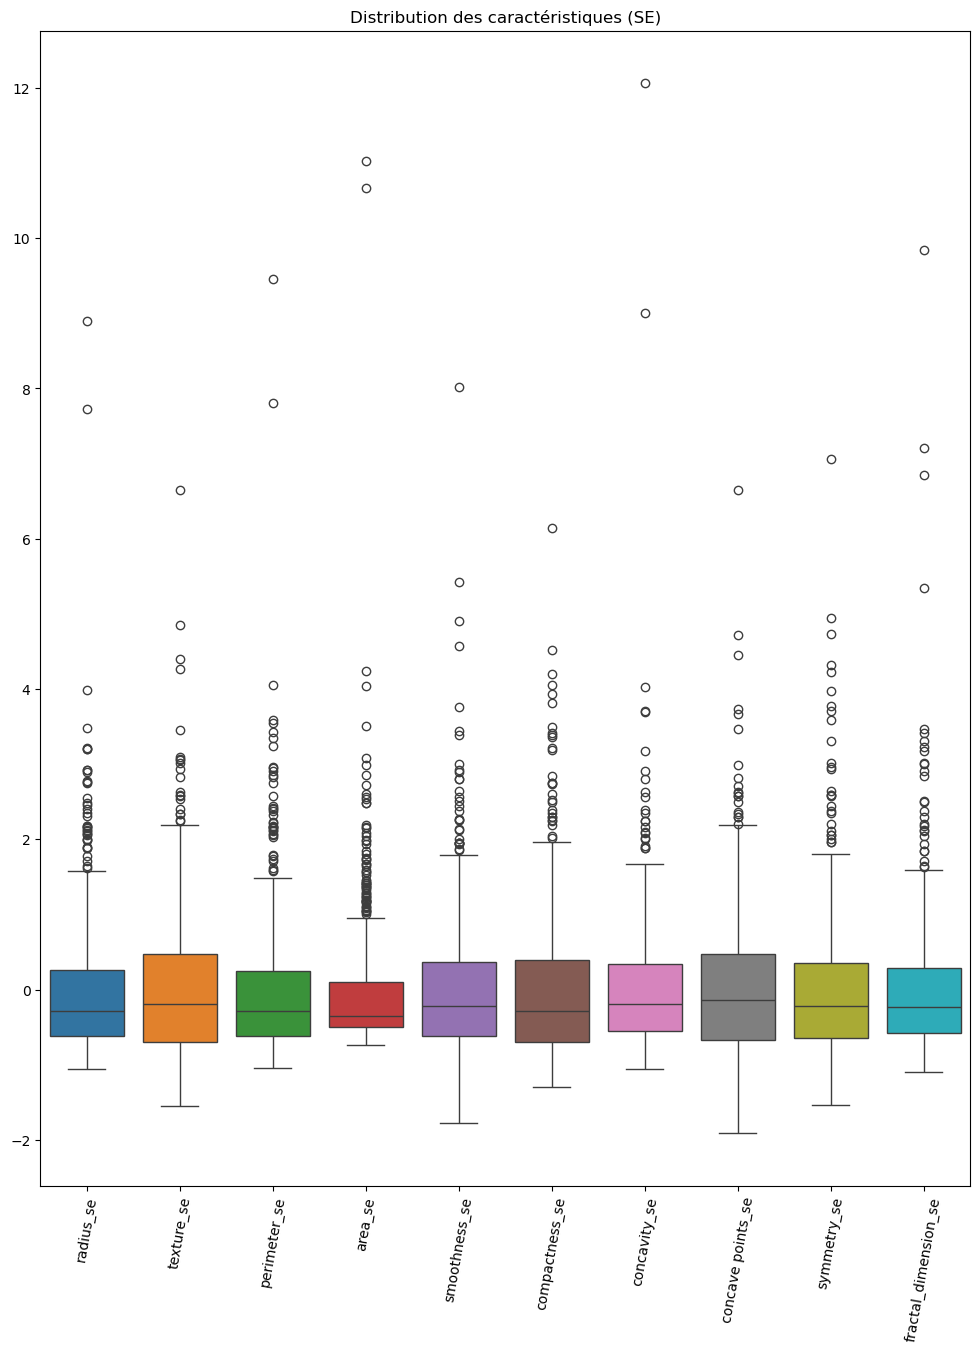

In [27]:
data_std = pd.concat([label, features_std.iloc[:,10:20]], axis=1)
plt.figure(figsize=(12, 15)) 
sns.boxplot(data=data_std.drop('diagnosis', axis=1))  
plt.title('Distribution des caractéristiques (SE)')  
plt.xticks(rotation=80) 
plt.show()

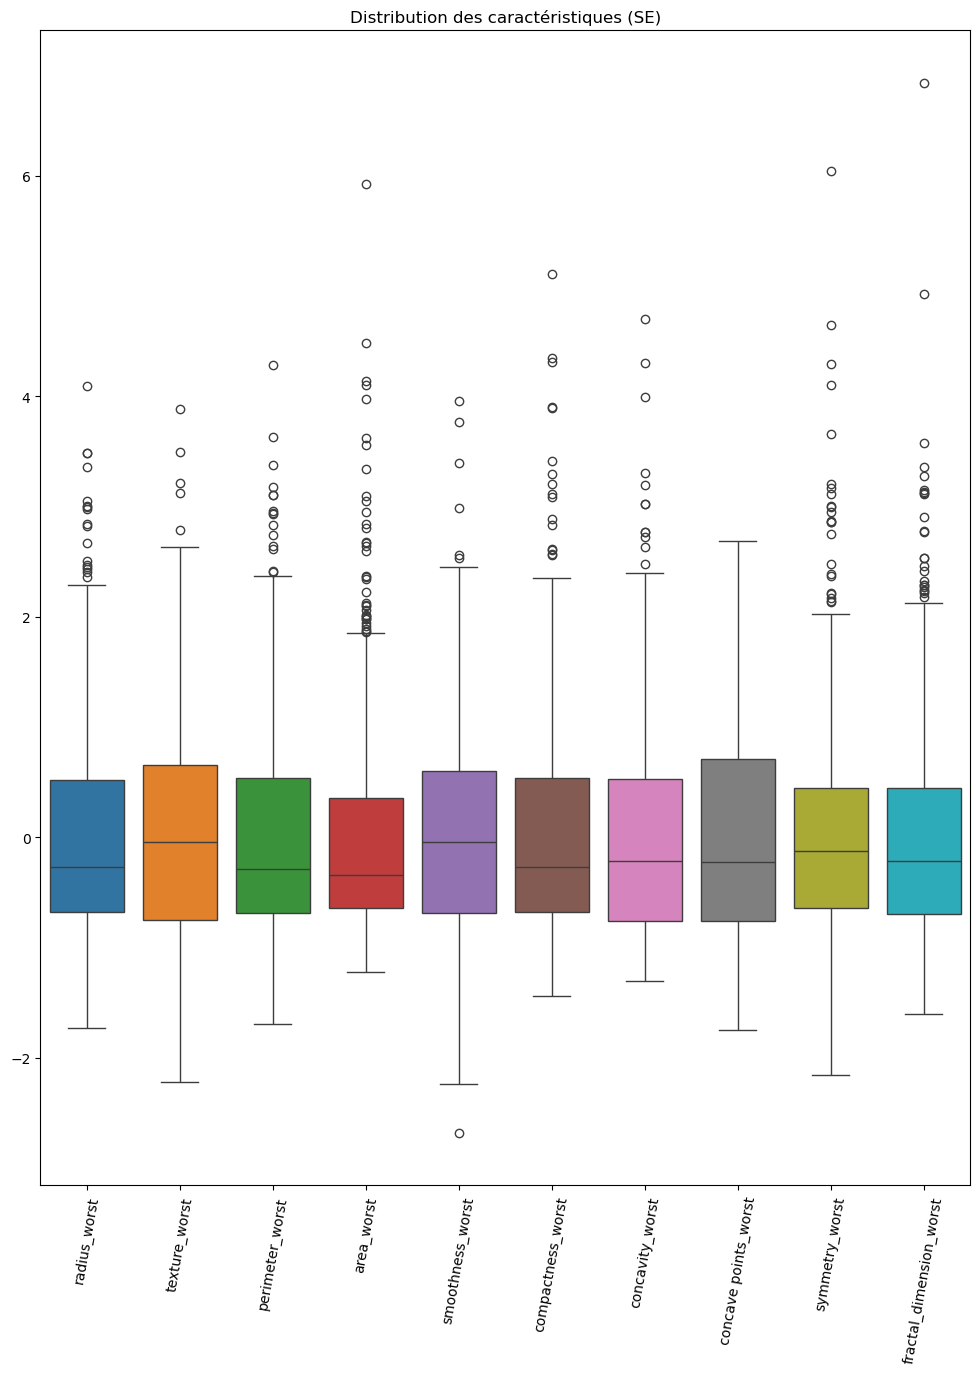

In [28]:
data_std = pd.concat([label, features_std.iloc[:,20:30]], axis=1)
plt.figure(figsize=(12, 15)) 
sns.boxplot(data=data_std.drop('diagnosis', axis=1))  
plt.title('Distribution des caractéristiques (SE)')  
plt.xticks(rotation=80) 
plt.show()

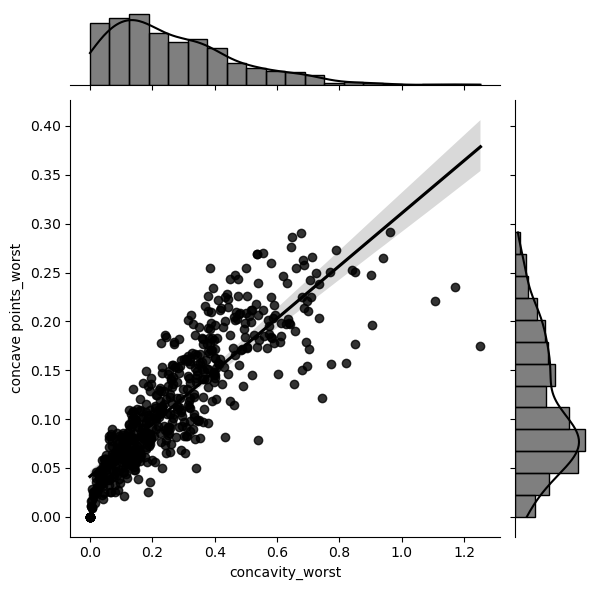

In [29]:
sns.jointplot(x='concavity_worst', y='concave points_worst', data=features, kind="reg", color="black")


Conclusion : on peut supprimer  deux variable qui sont fortement corelé (presque pareil): parmi ces 4 

concavity_worst et concave points_worst
perimeter_mean et area_mean

In [30]:
#label =y
#features = x
#data : rassemble tout les donnees
#featyres_std

In [31]:
label.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [32]:
data2 = pd.concat([label,features_std.iloc[:,0:10]],axis=1)

In [33]:
data2.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M     1.096100     -2.071512        1.268817   0.983510   
1         M     1.828212     -0.353322        1.684473   1.907030   
2         M     1.578499      0.455786        1.565126   1.557513   
3         M    -0.768233      0.253509       -0.592166  -0.763792   
4         M     1.748758     -1.150804        1.775011   1.824624   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.567087          3.280628        2.650542             2.530249   
1        -0.826235         -0.486643       -0.023825             0.547662   
2         0.941382          1.052000        1.362280             2.035440   
3         3.280667          3.399917        1.914213             1.450431   
4         0.280125          0.538866        1.369806             1.427237   

   symmetry_mean  fractal_dimension_mean  
0       2.215566                2.253764  
1       0.001391               -0.867889  
2       0.938859               -0.397658  
3       2.864862                4.906602  
4      -0.009552               -0.561956

Temps d'exécution: 2.885136842727661 secondes


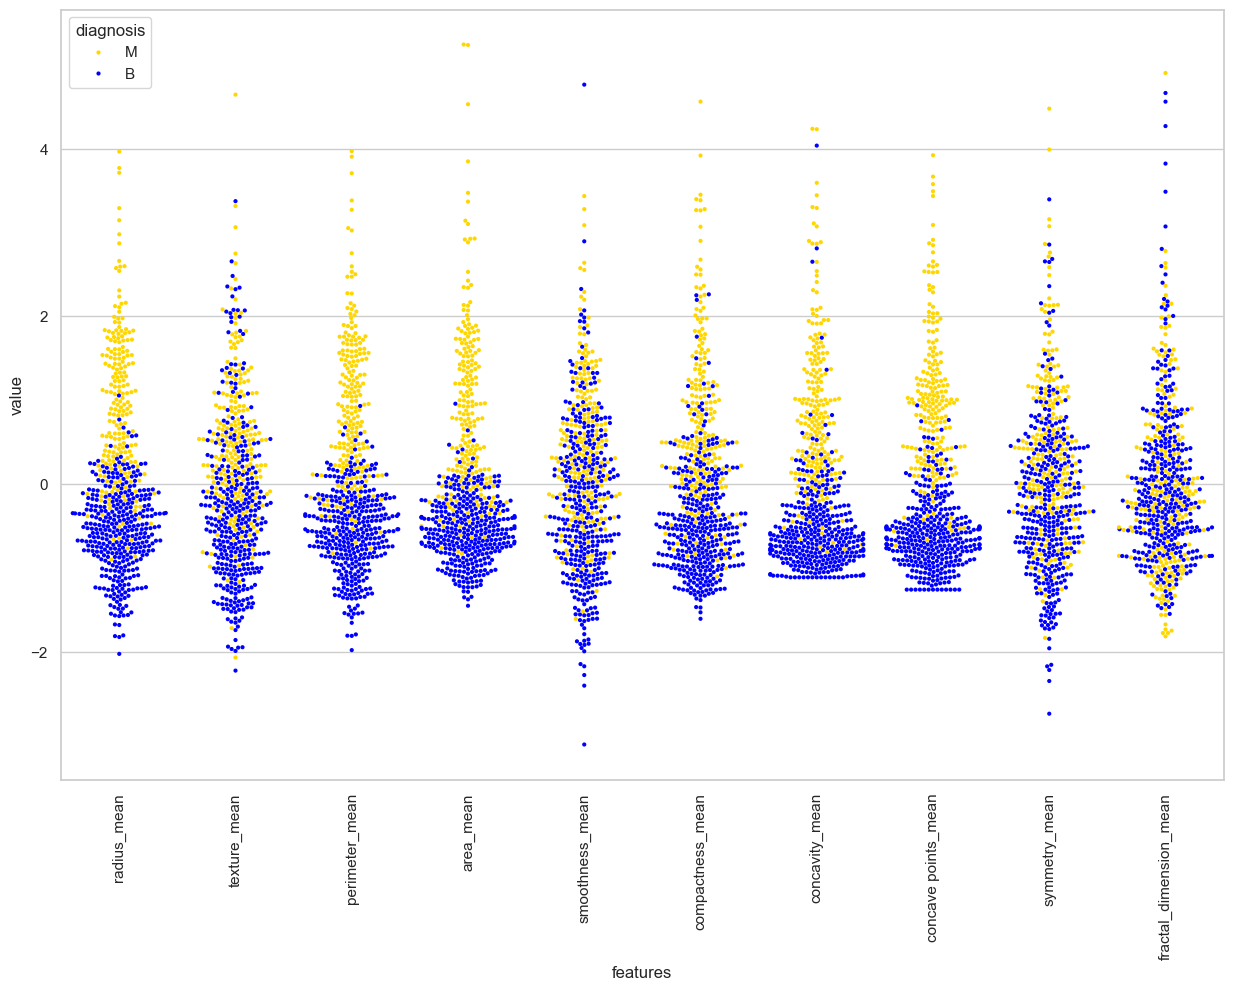

In [34]:
sns.set(style="whitegrid", palette="muted")
data2 = pd.concat([label, features_std.iloc[:, 0:10]], axis=1)
data2 = pd.melt(data2, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(15,10))
tic = time.time()
#une palette de couleurs personnalisée
palette_custom = {"M": "gold", "B": "blue"}  
# Utilisation de la palette personnalisée dans le swarm plot
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data2, size=3, palette=palette_custom)
plt.xticks(rotation=90)
toc = time.time()
print(f"Temps d'exécution: {toc - tic} secondes")
plt.show()

Temps d'exécution: 5.277833461761475 secondes


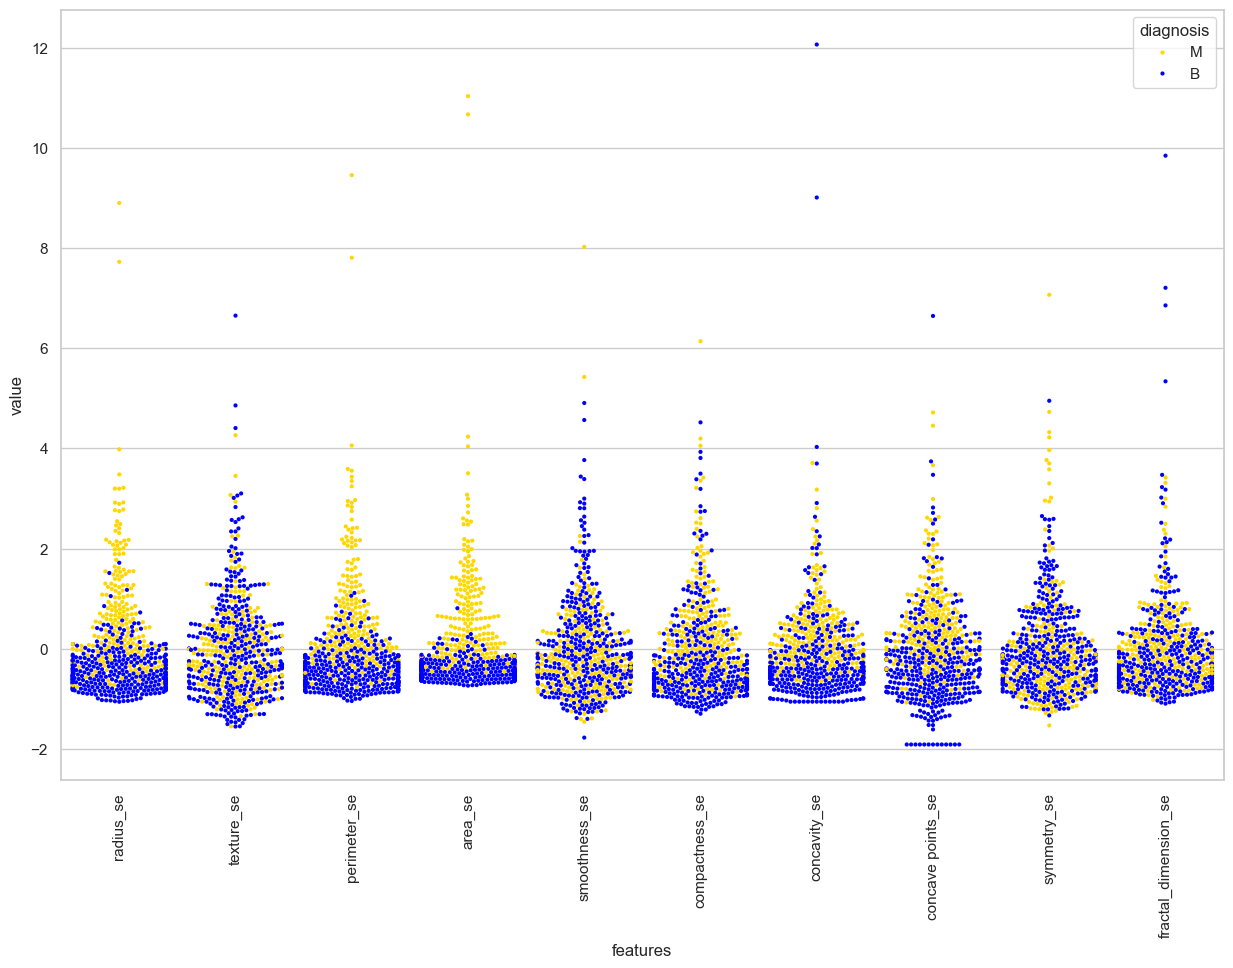

In [35]:
sns.set(style="whitegrid", palette="muted")
data2 = pd.concat([label, features_std.iloc[:, 10:20]], axis=1)
data2 = pd.melt(data2, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(15,10))
tic = time.time()
# Définition d'une palette de couleurs personnalisée
palette_custom = {"M": "gold", "B": "blue"}  # Exemple de couleurs pour M et B
# Utilisation de la palette personnalisée dans le swarm plot
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data2, size=3, palette=palette_custom)
plt.xticks(rotation=90)
toc = time.time()
print(f"Temps d'exécution: {toc - tic} secondes")
plt.show()

Temps d'exécution: 2.9699649810791016 secondes


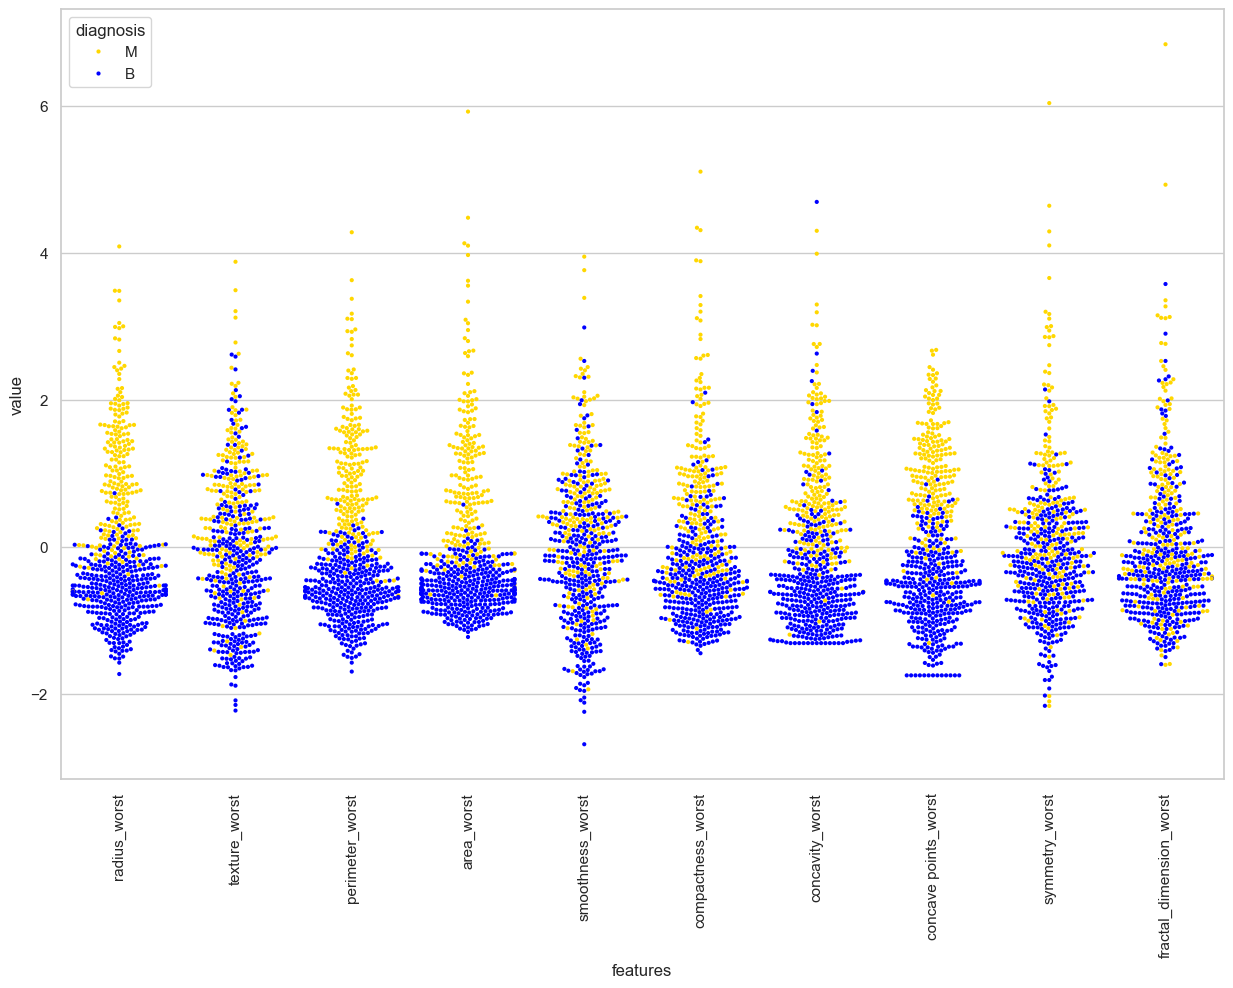

In [36]:
sns.set(style="whitegrid", palette="muted")
data2 = pd.concat([label, features_std.iloc[:, 20:30]], axis=1)
data2 = pd.melt(data2, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(15,10))
tic = time.time()
# Définition d'une palette de couleurs personnalisée
palette_custom = {"M": "gold", "B": "blue"}  # Exemple de couleurs pour M et B
# Utilisation de la palette personnalisée dans le swarm plot
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data2, size=3, palette=palette_custom)
plt.xticks(rotation=90)
toc = time.time()
print(f"Temps d'exécution: {toc - tic} secondes")
plt.show()

Ici je peux voir la variance plus clairement.

À mon avis, la zone la plus mauvaise dans le dernier essaim semble être maligne et bénigne, mais pas totalement séparées. Cependant, smoothness_se dans swarm plot 2 semble être un mélange de malin et de bénin, il est donc difficile de le classer lors de l'utilisation de cette fonctionnalité.



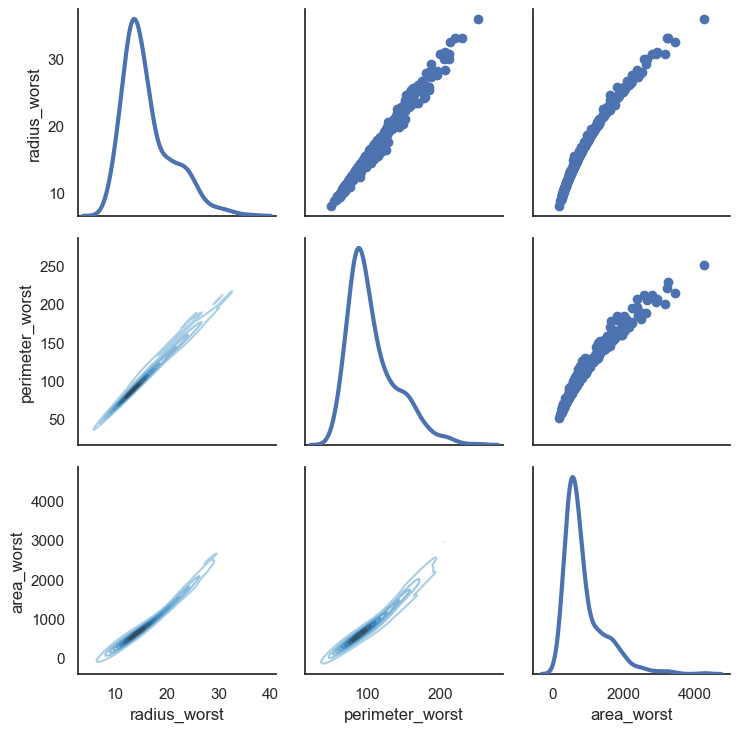

In [37]:
sns.set(style="white")
df = features.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# Variance et Ecart_Type

In [38]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [39]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [40]:
df_numerique = data.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)
variances = df_numerique.var()
ecarts_types = df_numerique.std()
# Affichage
print("Variance de chaque caractéristique numérique :")
print(variances)
print("\nÉcart type de chaque caractéristique numérique :")
print(ecarts_types)

Variance de chaque caractéristique numérique :
radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst

Dispersion Variable entre les Caractéristiques : Les valeurs de variance et d'écart type varient considérablement d'une caractéristique à l'autre.

Cela indique une dispersion très différente des valeurs autour de leur moyenne pour chaque caractéristique. 

Par exemple, des caractéristiques telles que area_mean et area_worst présentent des variances et des écarts types beaucoup plus élevés que des caractéristiques telles que smoothness_mean ou fractal_dimension_mean. 

Cela suggère que les tailles des aires présentent une variabilité beaucoup plus grande que les mesures de texture ou de douceur.

Influence Potentielle sur les Modèles de Machine Learning : Les caractéristiques avec une grande variance et un grand écart type peuvent avoir une influence plus significative sur certains modèles de machine learning, en particulier ceux qui ne normalisent pas automatiquement les données (comme les arbres de décision). Cependant, pour des modèles sensibles à l'échelle des caractéristiques, comme la régression linéaire ou les SVM, ces grandes différences dans la dispersion peuvent entraîner des problèmes de convergence ou des performances médiocres si les données ne sont pas standardisées.

Importance de la Standardisation : La grande variabilité dans les variances et les écarts types souligne l'importance de la standardisation des caractéristiques, surtout lorsque vous travaillez avec des algorithmes qui sont sensibles à l'échelle des données. La standardisation transforme les données pour que chaque caractéristique ait une moyenne de 0 et un écart type de 1, réduisant les disparités de dispersion et permettant une comparaison équitable entre les caractéristiques.

Identification des Caractéristiques Significatives : Les caractéristiques avec des variances et des écarts types très faibles peuvent ne pas apporter beaucoup d'information utile pour la séparation des classes ou la prédiction, car elles indiquent peu de variation dans les données. Cependant, cela ne signifie pas automatiquement que ces caractéristiques doivent être exclues de l'analyse, car leur importance peut dépendre du contexte spécifique et de l'interaction avec d'autres variables.

Analyse Plus Approfondie : Pour certaines applications, il pourrait être utile d'examiner plus en détail pourquoi certaines caractéristiques ont une dispersion beaucoup plus élevée. Cela pourrait être dû à la nature des données, à des erreurs de mesure, ou à la présence de valeurs aberrantes. Une analyse plus approfondie, y compris l'examen des distributions et la recherche de valeurs aberrantes, peut fournir des insights supplémentaires.

En conclusion, ces résultats mettent en évidence l'importance de comprendre la distribution et la dispersion de vos données avant d'appliquer des techniques de modélisation statistique ou de machine learning. La préparation appropriée des données, y compris la standardisation et potentiellement la suppression des caractéristiques avec peu de variabilité, peut améliorer la qualité de vos analyses et la performance de vos modèles.


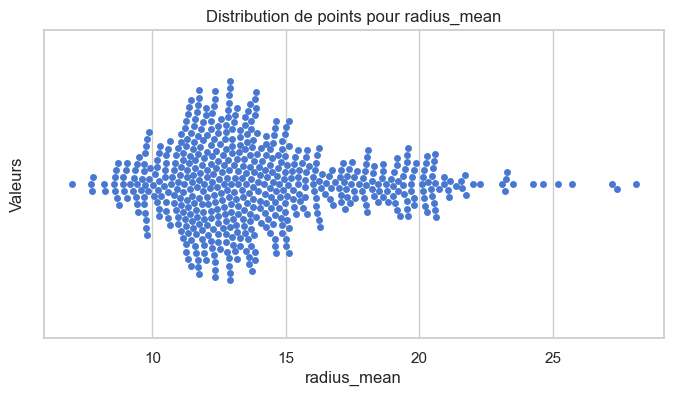

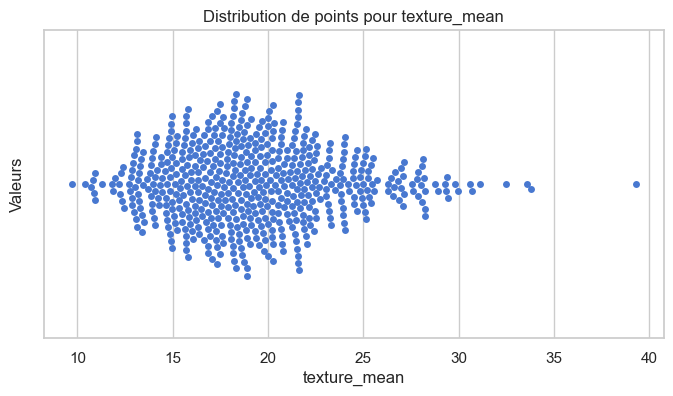

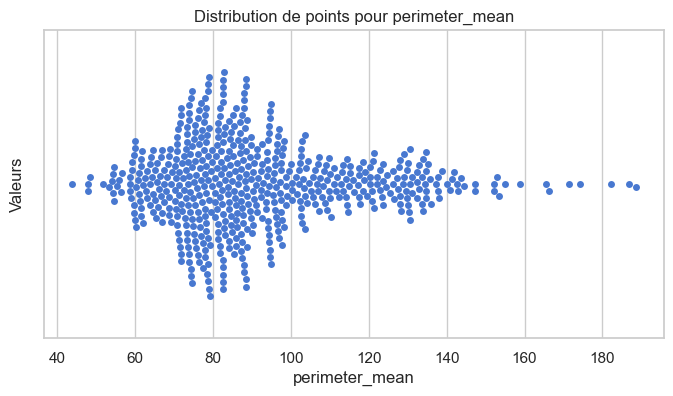

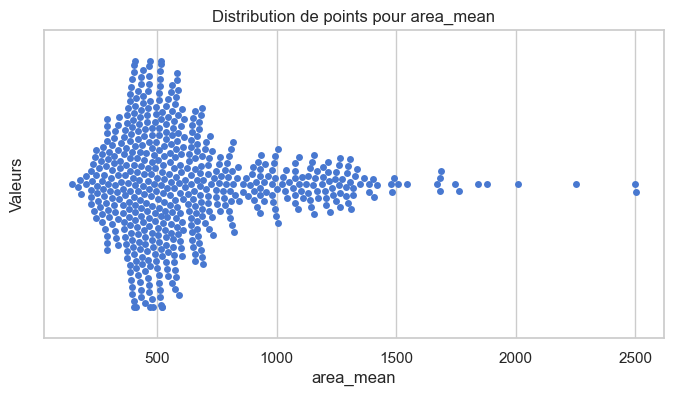

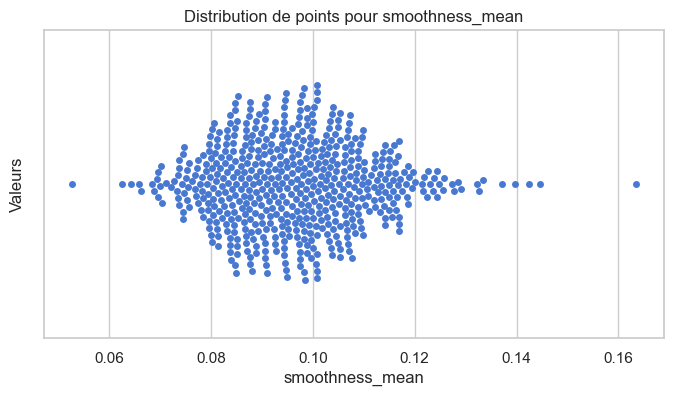

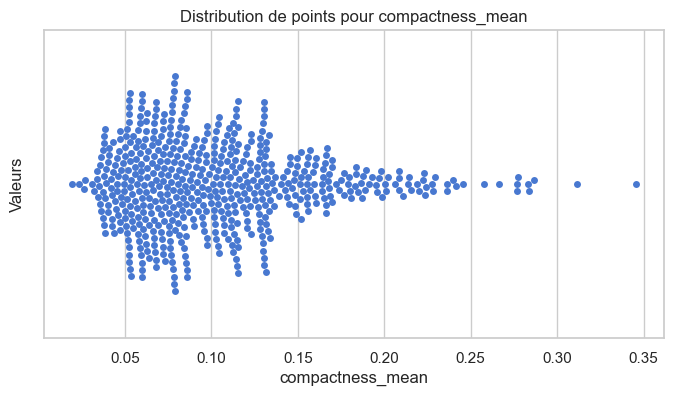

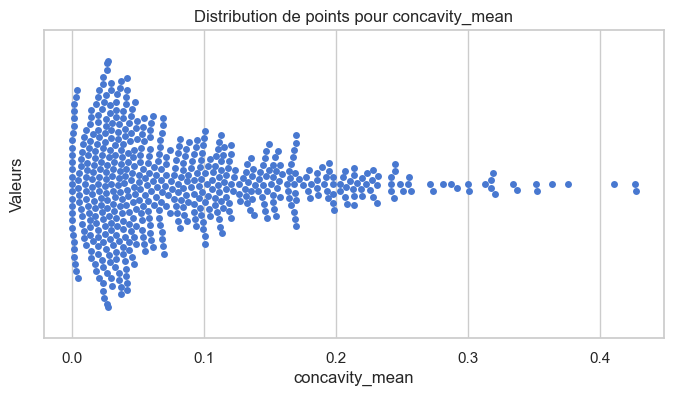

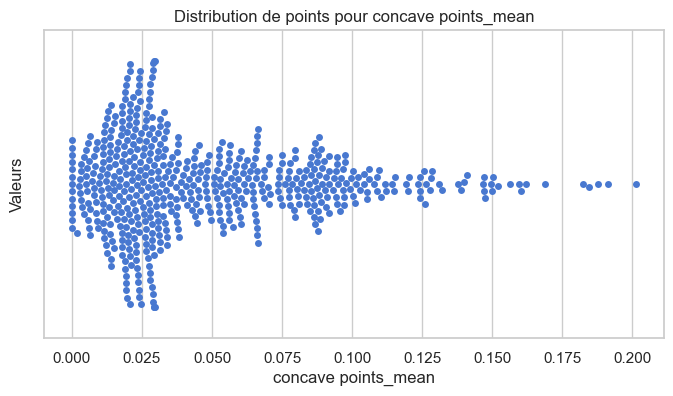

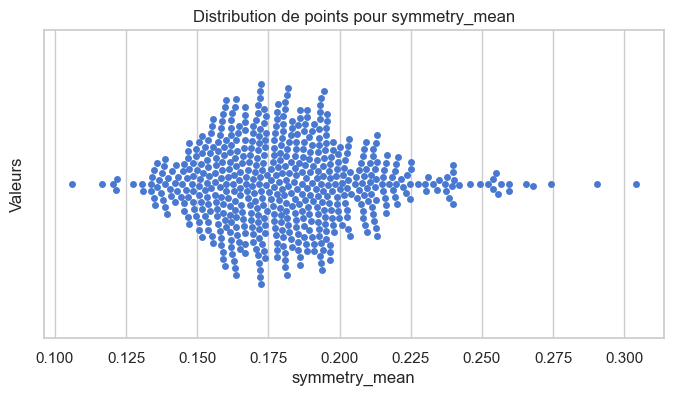

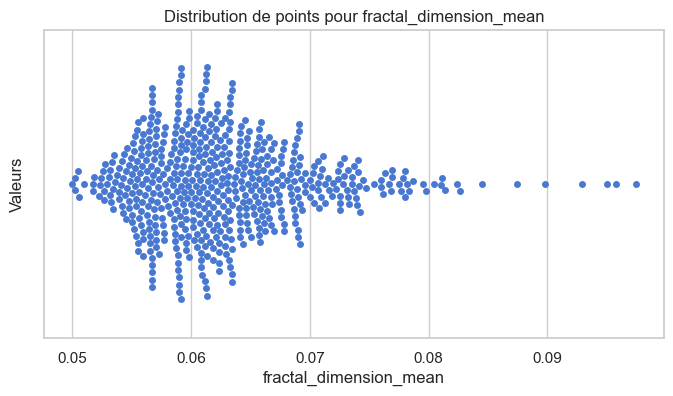

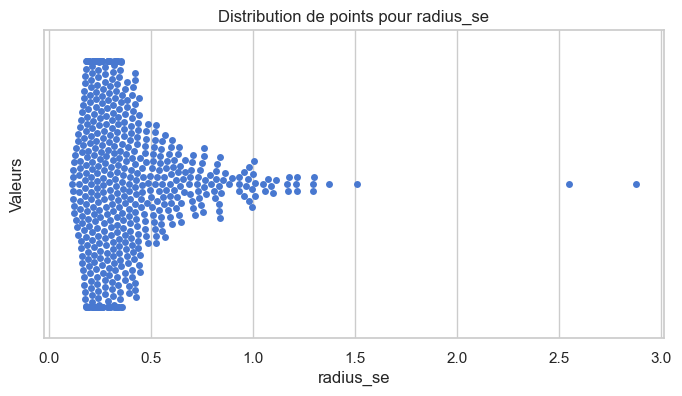

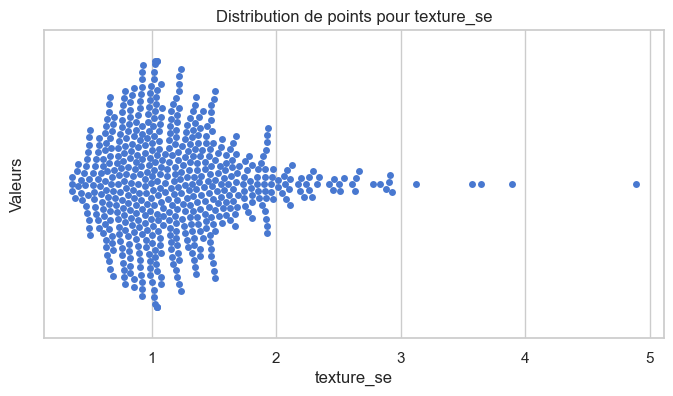

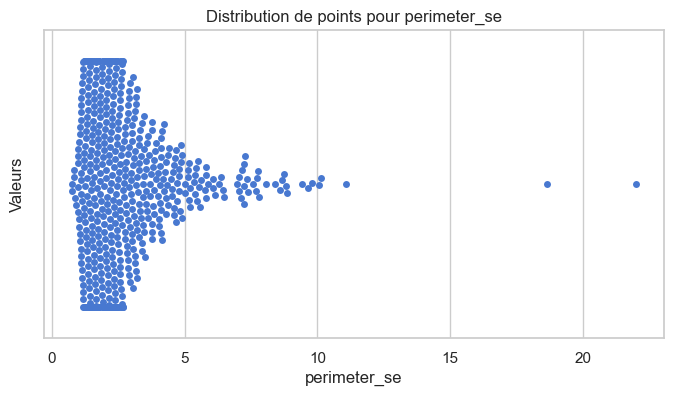

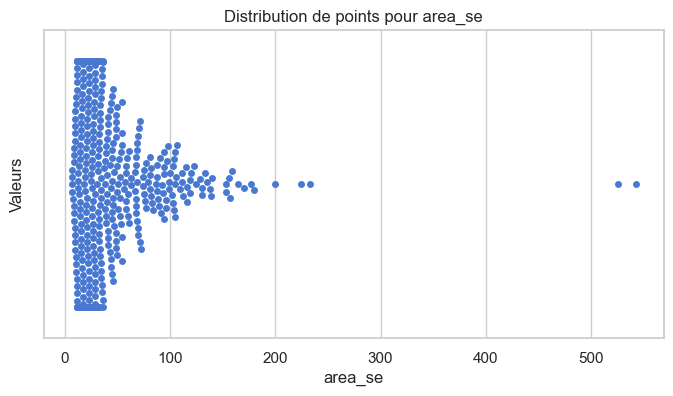

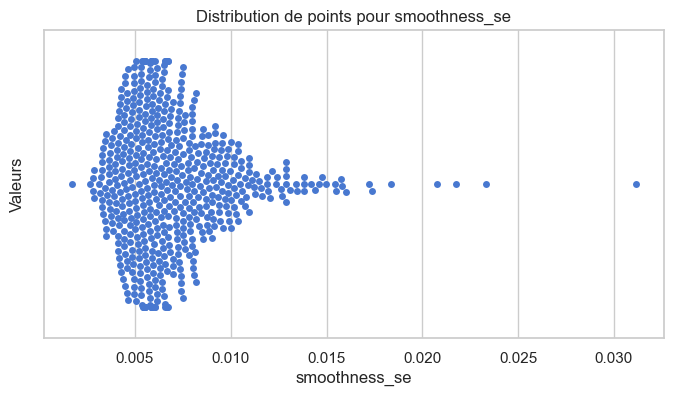

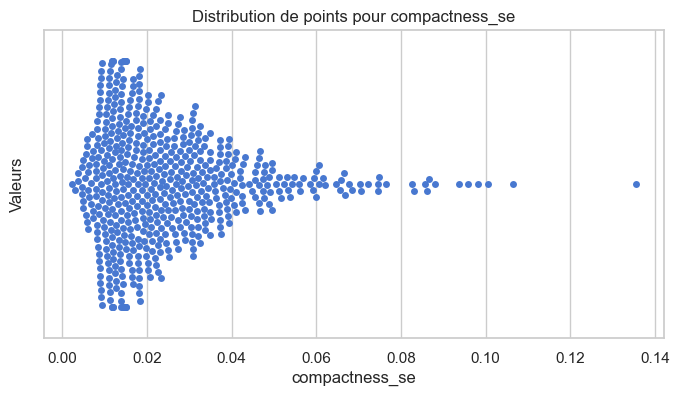

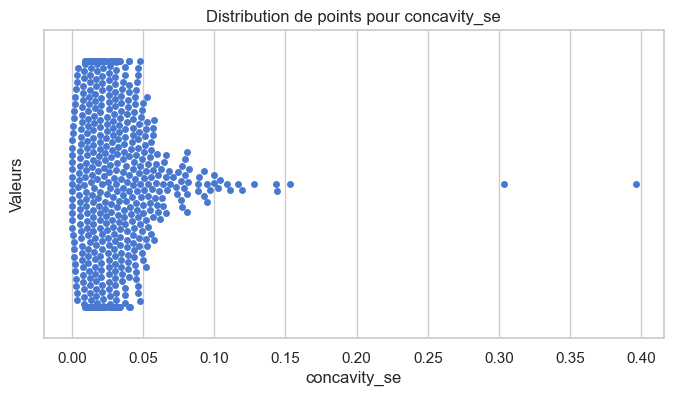

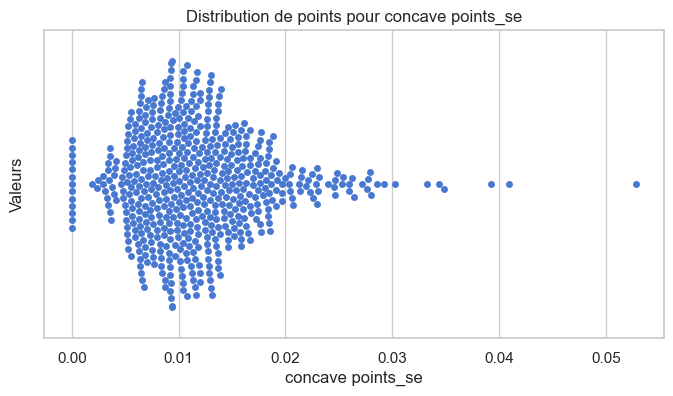

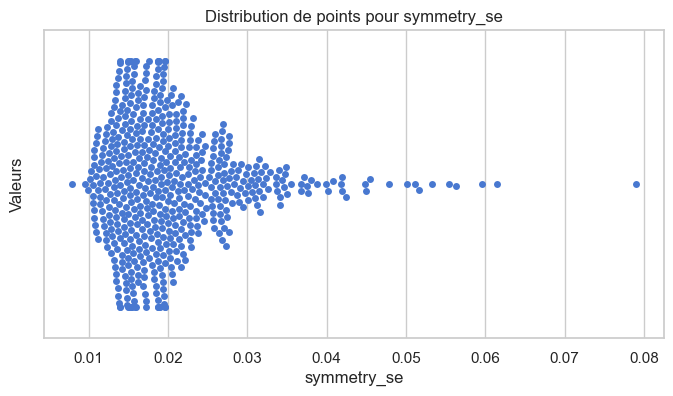

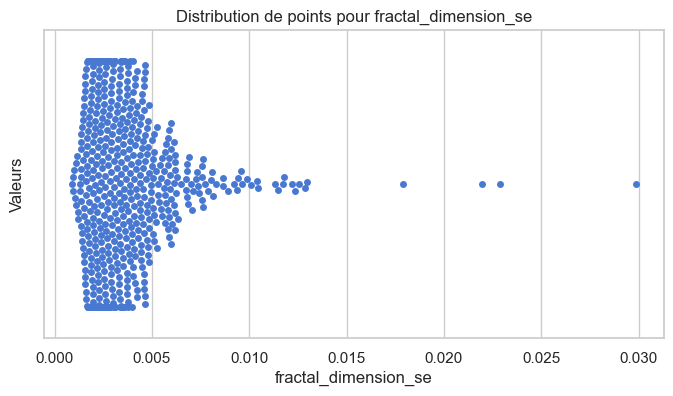

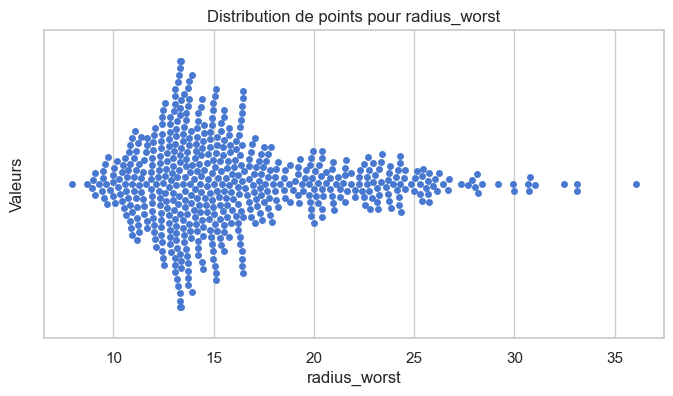

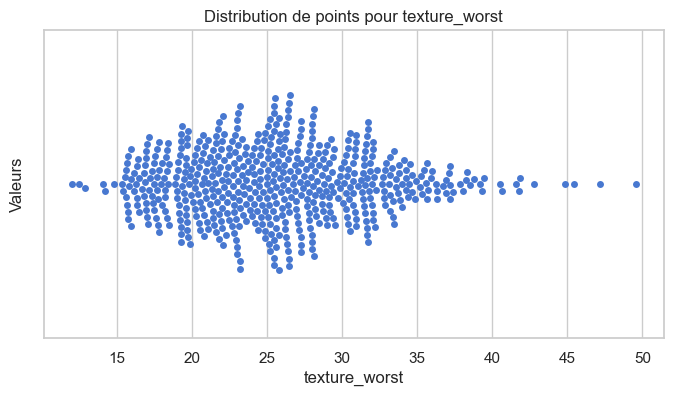

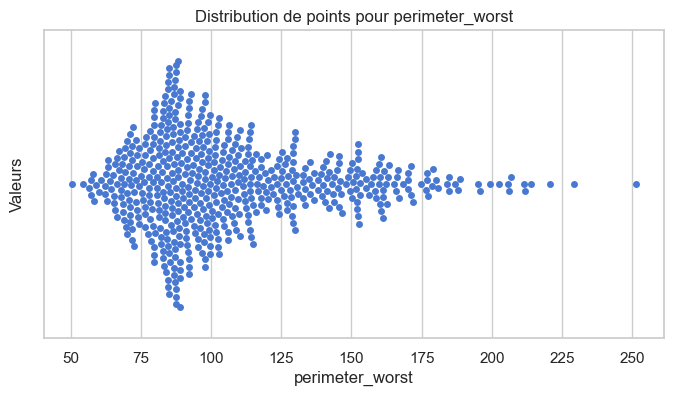

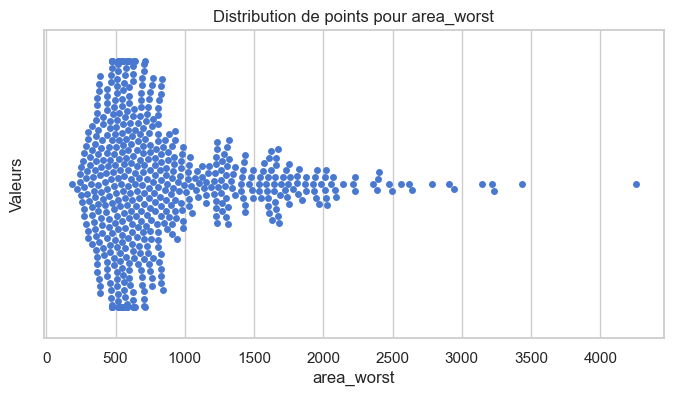

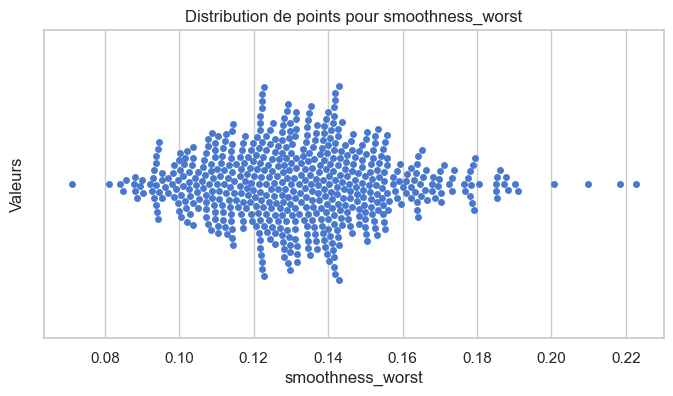

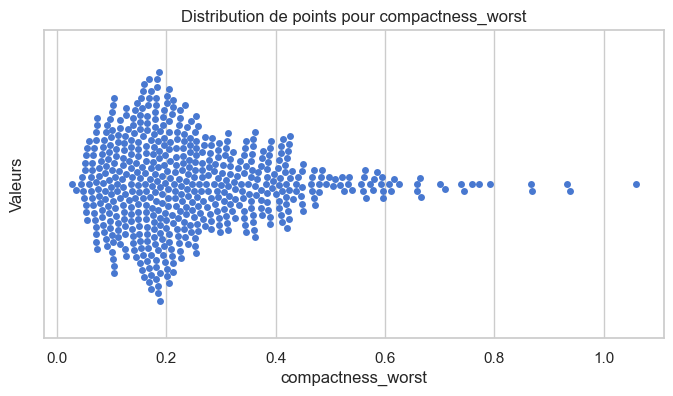

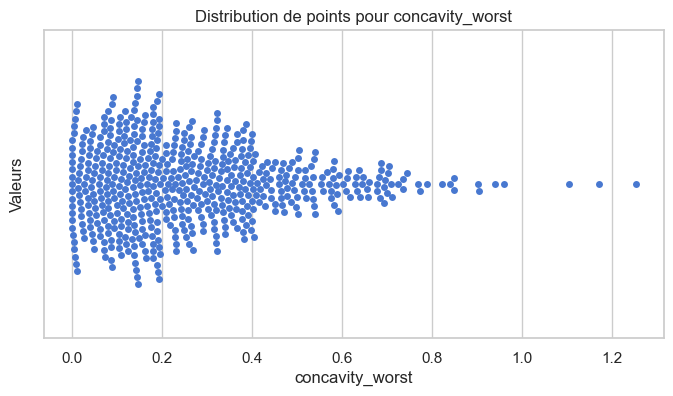

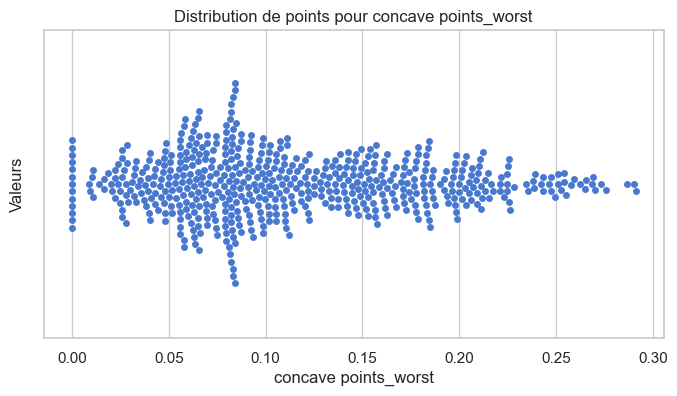

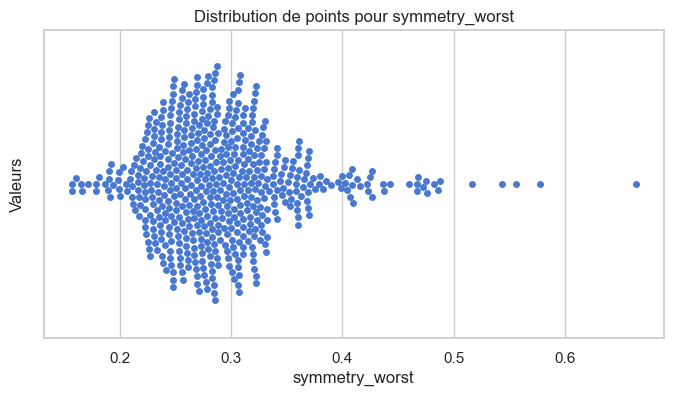

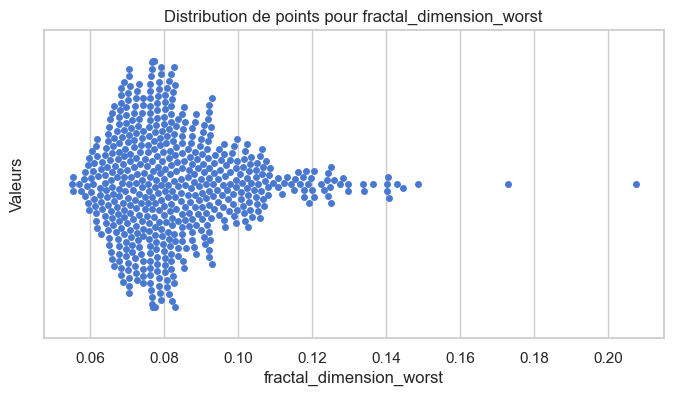

In [41]:
# Configuration de Seaborn
sns.set(style="whitegrid", palette="muted")

# Création de figures pour chaque variable numérique
for col in df_numerique.columns:
    plt.figure(figsize=(8, 4))
    sns.swarmplot(x=df_numerique[col])
    plt.title(f'Distribution de points pour {col}')
    plt.ylabel('Valeurs')
    plt.show()


# Analyse Bivariéé

In [42]:
# Calcul de la matrice de corrélation
matrice_correlation = df_numerique.corr()
matrice_correlation

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

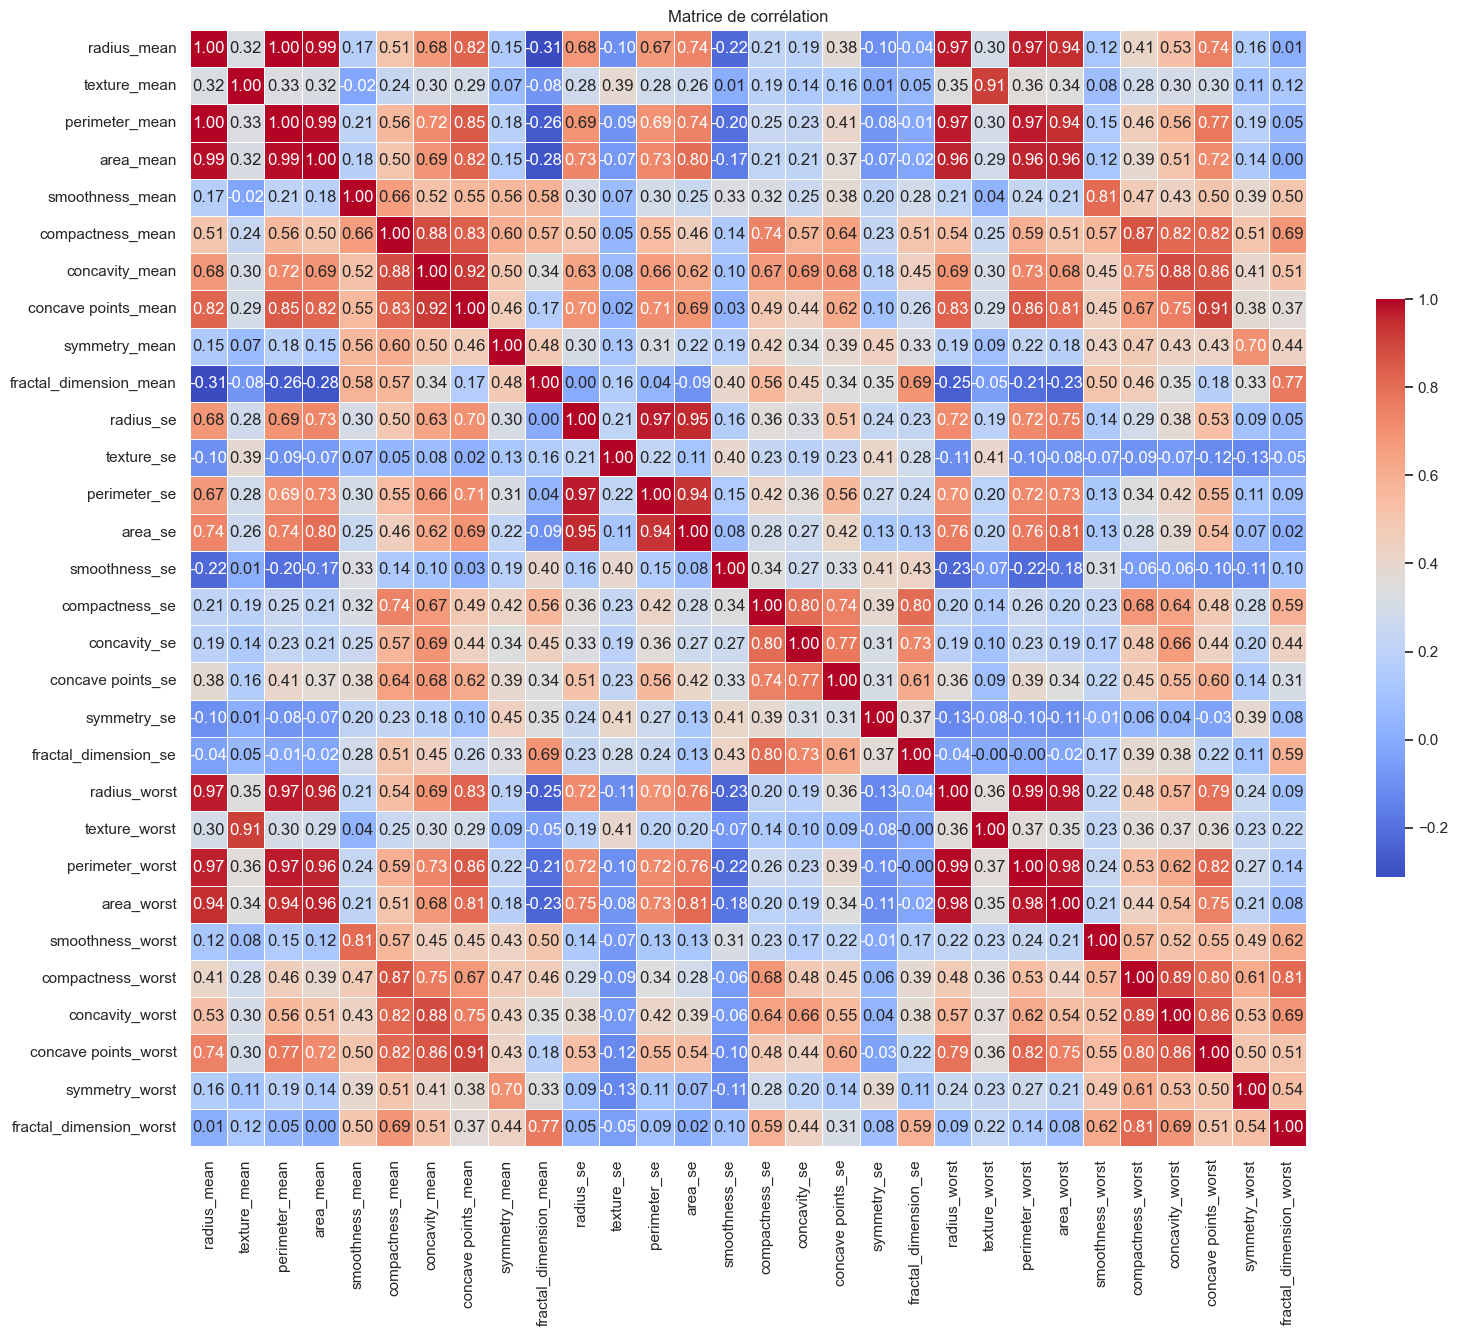

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de Seaborn
sns.set(style="white")

# Création d'une heatmap pour la matrice de corrélation
plt.figure(figsize=(18, 15))
sns.heatmap(matrice_correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matrice de corrélation')
plt.show()


Corrélations Fortes entre Mesures Géométriques :

Il y a des corrélations très élevées (proches de 1) entre radius_mean, perimeter_mean, et area_mean, ainsi qu'entre leurs équivalents '_worst'. 
===> Cela est attendu car ces mesures sont géométriquement liées (le périmètre et l'aire d'un cercle sont directement liés à son rayon). 

Ces corrélations élevées suggèrent une redondance d'information, ce qui pourrait justifier une réduction de dimensionnalité ou la sélection de caractéristiques pour éviter la multicollinéarité dans les modèles de machine learning.

Corrélations entre Caractéristiques de Texture et Taille : Il existe des corrélations modérées entre les mesures de texture (texture_mean, texture_worst) et les mesures géométriques. Cela peut indiquer une relation entre la texture de la tumeur et sa taille ou sa croissance.

Indicateurs de Concavité et Points Concaves : Les caractéristiques liées à la concavité (concavity_mean, concave points_mean et leurs équivalents '_worst') montrent également de fortes corrélations entre elles et avec les mesures géométriques. 

===> Cela suggère que les tumeurs avec des régions plus concaves ont tendance à être plus grandes et peuvent être plus susceptibles d'être malignes.

Relation entre la Lissité et les Dimensions Fractales : Les mesures de lissité (smoothness_mean, smoothness_worst) et les dimensions fractales (fractal_dimension_mean, fractal_dimension_worst) présentent des corrélations positives modérées avec d'autres caractéristiques, ce qui indique que la complexité de la surface de la tumeur pourrait être liée à d'autres propriétés de la tumeur.

Potentiel pour la Prédiction de Diagnostic : Les caractéristiques qui montrent des corrélations fortes avec de nombreuses autres (par exemple, concave points_worst) pourraient être particulièrement utiles pour prédire le diagnostic (maligne vs bénigne), car elles capturent des informations importantes sur la tumeur.

Implications pour la Modélisation:

Sélection de Caractéristiques : La présence de corrélations élevées suggère que certaines caractéristiques peuvent être redondantes. La sélection de caractéristiques ou l'extraction de caractéristiques (par exemple, via une analyse en composantes principales, PCA) pourrait être bénéfique pour simplifier le modèle sans perdre d'information significative.

Prudence avec la Multicollinéarité : Pour les modèles sensibles à la multicollinéarité, comme la régression linéaire, il peut être nécessaire d'éliminer certaines variables corrélées ou d'utiliser des techniques de régularisation.

Caractéristiques Importantes pour la Classification : Les caractéristiques avec des corrélations fortes à la fois entre elles et avec d'autres variables peuvent jouer un rôle clé dans la distinction entre les tumeurs malignes et bénignes, ce qui mérite une analyse plus approfondie.


# Avant ACP
Avant de faire lanalyse alaide de ACP je veux tenter de selectionné quelques variable significatif a partir de cette relation de coorelation et les figure analyser precedement pour mettre en pnplace un modele de  classification

In [44]:
# `matrice_correlation` contient la matrice de corrélation
# Filtrer la matrice de corrélation pour les valeurs supérieures à 0,8
# np.triu pour s'assurer qu'on ne considère que la moitié supérieure de la matrice (pour éviter les doublons)
mask = np.triu(np.ones_like(matrice_correlation, dtype=bool), k=1)
corr_fortes = matrice_correlation.where(mask) > 0.85

# Extraire les paires de corrélations fortes (supérieures à 0,8)
paires_fortes = corr_fortes.stack().reset_index()
paires_fortes.columns = ['Variable1', 'Variable2', 'Correlation']

# Filtrer pour garder uniquement les corrélations > 0.8
paires_fortes = paires_fortes[paires_fortes['Correlation'] > 0.9]

print(paires_fortes)


               Variable1             Variable2  Correlation
2            radius_mean        perimeter_mean         True
3            radius_mean             area_mean         True
20           radius_mean          radius_worst         True
22           radius_mean       perimeter_worst         True
23           radius_mean            area_worst         True
51          texture_mean         texture_worst         True
63        perimeter_mean             area_mean         True
67        perimeter_mean   concave points_mean         True
80        perimeter_mean          radius_worst         True
82        perimeter_mean       perimeter_worst         True
83        perimeter_mean            area_worst         True
110            area_mean          radius_worst         True
112            area_mean       perimeter_worst         True
113            area_mean            area_worst         True
156     compactness_mean        concavity_mean         True
175     compactness_mean     compactness

In [45]:


# Votre matrice de corrélation ici
# matrice_correlation = ...

# Convertir la matrice de corrélation en distances
distances = 1 - matrice_correlation.abs()  # Utiliser abs pour traiter les corrélations négatives également

# Convertir le DataFrame en matrice carrée, nécessaire pour `linkage`
distances_condensed = squareform(distances, checks=False)

# Effectuer le clustering hiérarchique
Z = linkage(distances_condensed, 'average')

# Déterminer les clusters avec un seuil de distance (par exemple 0,2 pour des corrélations fortes)
threshold = 0.2
clusters = fcluster(Z, threshold, criterion='distance')

# Associer chaque variable à son cluster
cluster_map = pd.DataFrame({'variable': matrice_correlation.columns, 'cluster': clusters})

# Trier par cluster
cluster_map.sort_values('cluster', inplace=True)

# Pour afficher les groupes de variables fortement corrélées
for cluster_id in sorted(cluster_map['cluster'].unique()):
    print(f"Cluster {cluster_id}:")
    members = cluster_map['variable'][cluster_map['cluster'] == cluster_id].tolist()
    print(members)


Cluster 1:
['smoothness_se']
Cluster 2:
['symmetry_se']
Cluster 3:
['texture_se']
Cluster 4:
['texture_mean', 'texture_worst']
Cluster 5:
['symmetry_mean']
Cluster 6:
['symmetry_worst']
Cluster 7:
['smoothness_worst', 'smoothness_mean']
Cluster 8:
['fractal_dimension_mean']
Cluster 9:
['fractal_dimension_worst']
Cluster 10:
['compactness_se', 'fractal_dimension_se']
Cluster 11:
['concavity_se']
Cluster 12:
['concave points_se']
Cluster 13:
['concavity_worst', 'compactness_worst']
Cluster 14:
['concave points_mean', 'concave points_worst', 'concavity_mean', 'compactness_mean']
Cluster 15:
['perimeter_mean', 'area_worst', 'radius_worst', 'area_mean', 'perimeter_worst', 'radius_mean']
Cluster 16:
['radius_se', 'area_se', 'perimeter_se']


* radius_mean, perimeter_mean and area_mean : JE  SELECTE  area_mean EN SE BASANT SUR LA FIGURE  de swarm plots area_mean ===>les donnees sont plus aumoins meiux separé 

* compactness_mean, concavity_mean and concave points_mean sont  bien cooreler entre eux : ====> choix : concavity_mean

* texture_mean and texture_worst sont  bien cooreler entre eux : ======> choix texture_mean

* radius_se, perimeter_se et  area_se sont  bien cooreler entre eux : ======> choix : area_se.

* compactness_se, concavity_se et concave points_se sont  bien cooreler entre eux : ======> choix  concavity_se.

* radius_worst, perimeter_worst et  area_worst sont  bien cooreler entre eux : ======> choix : area_worst

* compactness_worst, concavity_worst et concave points_worst sont  bien cooreler entre eux : ======> choix : concavity_worst

* area_worst and area_mean sont  bien cooreler entre eux : ======> choix :  area_mean.




In [46]:
features.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [70]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
Z = features.drop(drop_list,axis = 1 )        # on crer une nouvelle liste X 
Z.head()

TypeError: Index.drop() got an unexpected keyword argument 'axis'

In [48]:
print(Z.shape)

(569, 16)


<Axes: >

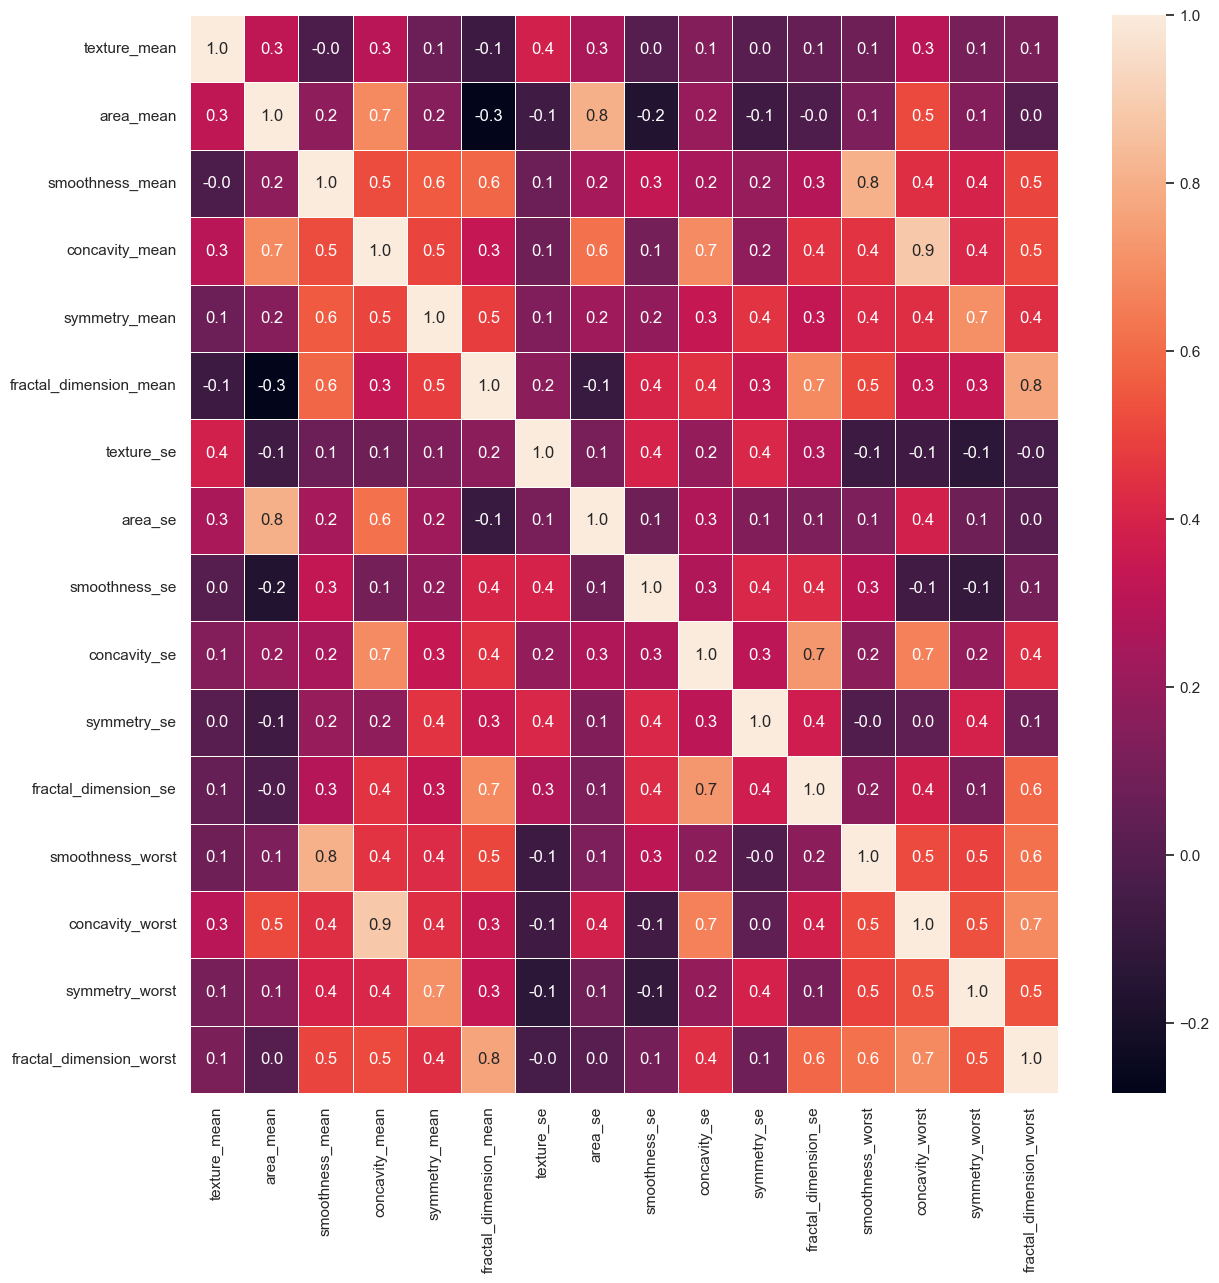

In [49]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(Z.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

* je veux tester si le chois que je fais est un bon choix ou pas : si les variables selectionné me donne une bonne prediction
* test avec RandomForestClassifier

Accuracy is:  0.9649122807017544


<Axes: >

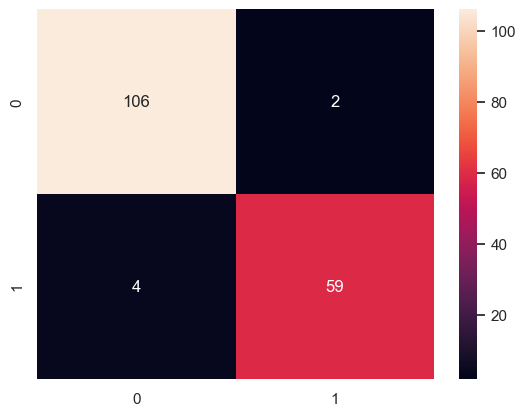

In [52]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(Z, label, test_size=0.3, random_state=42)

#random forest classification avec  n_estimators=10 (defaut)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

La précision est de près de 97 % et comme le montre la matrice de confusion, nous faisons peu de prédictions erronées. 
Pas mal de tout comme resultat mais je veux essayer d'autres méthodes de sélection de fonctionnalités pour trouver de meilleurs résultats.

* Sélection de caractéristiques univariées et classification aléatoire des forêts
Dans la sélection de fonctionnalités univariées, jessaye SelectKBest qui supprime toutes les fonctionnalités sauf les k les plus performantes. 

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [54]:
import pandas as pd
# Après avoir ajusté SelectKBest à vos données
scores = select_feature.scores_
features = x_train.columns
# Créer un DataFrame contenant les scores et les noms de caractéristiques
features_scores = pd.DataFrame({'Feature': features, 'Score': scores})
# Trier le DataFrame en fonction des scores
features_scores = features_scores.sort_values(by='Score', ascending=False)
# Afficher le DataFrame
print(features_scores)


                    Feature         Score
1                 area_mean  36689.955660
7                   area_se   6127.410670
0              texture_mean     60.691643
13          concavity_worst     25.885812
3            concavity_mean     13.054765
14           symmetry_worst      1.006351
9              concavity_se      0.692897
12         smoothness_worst      0.263226
4             symmetry_mean      0.195983
15  fractal_dimension_worst      0.123087
2           smoothness_mean      0.100015
6                texture_se      0.040713
11     fractal_dimension_se      0.002659
10              symmetry_se      0.001396
8             smoothness_se      0.001325
5    fractal_dimension_mean      0.000343


In [69]:
# Obtenir les indices des 5 meilleures caractéristiques
indices_selected_features = select_feature.get_support(indices=True)
# Filtrer les scores et les noms des caractéristiques pour obtenir seulement ceux des 5 meilleures caractéristiques
selected_scores = select_feature.scores_[indices_selected_features]
selected_features = x_train.columns[indices_selected_features]
# Créer un DataFrame pour associer chaque score à sa caractéristique sélectionnée
selected_features_scores = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})
# Trier les caractéristiques sélectionnées par score de manière décroissante (facultatif, car seules les 5 meilleures sont sélectionnées)
selected_features_scores.sort_values(by='Score', ascending=False, inplace=True)
# Affichage des résultats
print(selected_features_scores)


NotFittedError: This SelectKBest instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

TOP 5   : 
area_mean, area_se, texture_mean, concavity_worst and concavity_mean.

Voyons donc ce qui se passe si nous utilisons uniquement ces 5 fonctionnalités les mieux notées

### TEST avec la standarisation des donnees  ( probleme avec les donnees negatives)

In [56]:
Z.head()

texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      386.1          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

## Les variables sur ce note book

In [72]:
%who DataFrame
del Z,Z_scaled_df,cluster_map,corr_fortes,data,data2,data_melted,data_std,df,df_numerique,distances,features_scores,features_std,matrice_correlation,paires_fortes,selected_features_scores

Z	 Z_scaled_df	 cluster_map	 corr_fortes	 data	 data2	 data_melted	 data_std	 df	 
df_numerique	 distances	 features_scores	 features_std	 matrice_correlation	 paires_fortes	 selected_features_scores	 


In [73]:
%who DataFrame

No variables match your requested type.


In [74]:
%who ndarray
del Z_scaled,clusters,cm,distances_condensed,indices_selected_features,mask,scores,selected_scores,x_test,x_train	

Z_scaled	 clusters	 cm	 distances_condensed	 indices_selected_features	 mask	 scores	 selected_scores	 x_test	 
x_train	 


In [75]:
%who ndarray

No variables match your requested type.


In [87]:
%who

# ax	 categories	 chemin_fichier	 chi2	 classification_report	 clf_rf	 clr_rf	 cluster_id	 col	 
# confusion_matrix	 counts	 datasets	 display	 drop_list	 ecarts_types	 f	 f1_score	 f_classif	 
# fcluster	 features	 g	 label	 linkage	 lire_csv	 list	 members	 np	 
# null_values	 palette_contrast	 palette_custom	 pd	 plt	 pourcentage_B	 pourcentage_M	 pourcentages	 px	 
# scaler	 select_feature	 selected_features	 sns	 squareform	 standarliser	 tabulate	 threshold	 tic	 
# time	 toc	 total_cases	 train_test_split	 variances	 warnings	 widgets	 y_test	 y_train	 


Interactive namespace is empty.


In [83]:
#del B,LogisticRegression,M,PCA,RandomForestClassifier,SelectKBest,StandardScaler,ac,accuracy_score	 
del ax,categories,chemin_fichier,chi2,classification_report,clf_rf,clr_rf,cluster_id,col,confusion_matrix,counts,datasets,display,drop_list,ecarts_types

In [86]:
del f,  f1_score,  f_classif,  fcluster,  features,  g,  label,  linkage,  lire_csv,  list,  members,  np,  null_values,  palette_contrast,  palette_custom,  pd,  plt,  pourcentage_B,  pourcentage_M,  pourcentages,  px,  scaler,  select_feature,  selected_features,  sns,  squareform,  standarliser,  tabulate,  threshold,  tic,  time,  toc,  total_cases,  train_test_split,  variances,  warnings,  widgets,  y_test,  y_train

### Application ACP

In [142]:
features_std.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.096100     -2.071512        1.268817   0.983510         1.567087   
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.280628        2.650542             2.530249       2.215566   
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                2.253764  ...      -1.358098         2.301575    1.999478   
1               -0.867889  ...      -0.368879         1.533776    1.888827   
2               -0.397658  ...      -0.023953         1.346291    1.455004   
3                4.906602  ...       0.133866        -0.249720   -0.549538   
4               -0.561956  ...      -1.465481         1.337363    1.219651   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          1.306537           2.614365         2.107672              2.294058   
1         -0.375282          -0.430066        -0.146620              1.086129   
2          0.526944           1.081980         0.854222              1.953282   
3          3.391291           3.889975         1.987839              2.173873   
4          0.220362          -0.313119         0.612640              0.728618   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0        2.748204                 1.935312          M  
1       -0.243675                 0.280943          M  
2        1.151242                 0.201214          M  
3        6.040726                 4.930672          M  
4       -0.867590                -0.396751          M  

[5 rows x 31 columns]

Variance expliquée par chaque composante : [0.44272026 0.18971182]
Variance totale expliquée : 0.6324320765155941


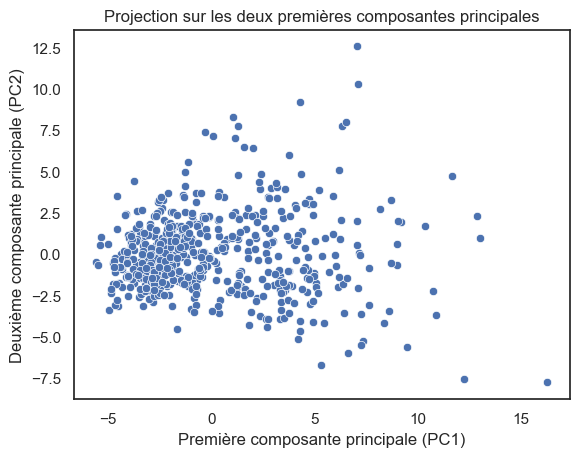

In [143]:
#'colonne_a_supprimer'
features_std= features_std.drop('diagnosis', axis=1)
data_standardisee = features_std
# 2. Application de l'ACP
# Choisissez le nombre de composantes principales, par exemple 2 pour la visualisation
pca = PCA(n_components=2)
principales_composantes = pca.fit_transform(data_standardisee)
# Création d'un nouveau DataFrame pour les composantes principales
df_pca = pd.DataFrame(data=principales_composantes, columns=['PC1', 'PC2'])
# 3. Analyse des résultats
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)
print("Variance totale expliquée :", sum(pca.explained_variance_ratio_))
# Visualisation (optionnel)
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Projection sur les deux premières composantes principales')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.show()


Les deux premières composantes principales expliquent environ 63.24% de la variance totale dans cette jeu de données.

Plus spécifiquement, la première composante principale (PC1) explique 44.27% de la variance, 

tandis que la deuxième composante principale (PC2) en explique 18.97%.

La première composante principale est la plus significative, capturant plus de la variance dans les données que la deuxième.
Cela suggère que PC1 représente les caractéristiques ou les variations les plus dominantes dans vos données



Bien que 63.24% de la variance expliquée soit significative, cela signifie aussi qu'environ 36.76% de la variance n'est pas capturée par ces deux composantes.
je veux envisager d'inclure davantage de composantes pour capturer plus de variance (par exemple, jusqu'à ce que la variance totale expliquée atteigne un seuil comme 80%, 90%, ou 95%).




In [222]:
# from sklearn.decomposition import PCA
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler

# data_standardisee = features_std

# # Application de l'ACP avec 4 composantes principales
# pca_4 = PCA(n_components=4)
# principales_composantes_4 = pca_4.fit_transform(data_standardisee)
# df_pca_4 = pd.DataFrame(data=principales_composantes_4, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# # Ajout des étiquettes (si pertinent) pour la visualisation
# df_pca_4['diagnosis'] = label

# # Analyse des résultats - Variance expliquée
# print("Variance expliquée par chaque composante :", pca_4.explained_variance_ratio_)
# print("Variance totale expliquée :", sum(pca_4.explained_variance_ratio_))

# # Visualisation - Projection sur les deux premières composantes principales
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=df_pca_4, palette='Set1')
# plt.title('Projection sur PC1 et PC2')
# plt.xlabel('Première composante principale (PC1)')
# plt.ylabel('Deuxième composante principale (PC2)')
# plt.show()

# # Création de scatter plots pour chaque paire de composantes principales
# n_composantes = 4  # Ou changez à 5 si vous utilisez df_pca_5 pour 5 composantes

# for i in range(n_composantes):
#     for j in range(i+1, n_composantes):
#         plt.figure(figsize=(6, 4))
#         sns.scatterplot(x=f'PC{i+1}', y=f'PC{j+1}', hue='diagnosis', data=df_pca_4, palette='Set1')
#         plt.title(f'Projection sur PC{i+1} vs PC{j+1}')
#         plt.xlabel(f'PC{i+1}')
#         plt.ylabel(f'PC{j+1}')
#         plt.show()


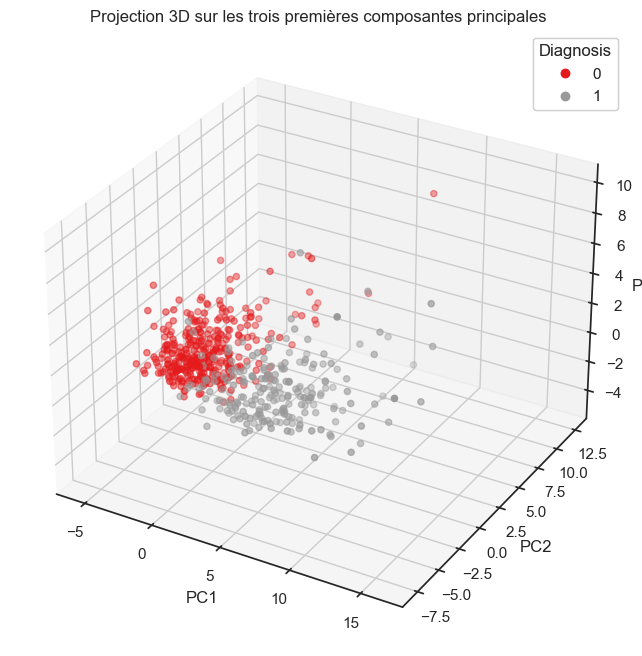

In [223]:
from mpl_toolkits.mplot3d import Axes3D

# Application de l'ACP avec 3 composantes principales pour une visualisation en 3D
pca_3 = PCA(n_components=3)
principales_composantes_3 = pca_3.fit_transform(data_standardisee)
df_pca_3 = pd.DataFrame(data=principales_composantes_3, columns=['PC1', 'PC2', 'PC3'])

# Ajout des étiquettes 'diagnosis' pour la visualisation
df_pca_3['diagnosis'] = label

# Création de la visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot en 3D avec coloration selon 'diagnosis'
scatter = ax.scatter(df_pca_3['PC1'], df_pca_3['PC2'], df_pca_3['PC3'], 
                     c=pd.Categorical(df_pca_3['diagnosis']).codes, cmap='Set1')

# Légende
legend1 = ax.legend(*scatter.legend_elements(), title="Diagnosis")
ax.add_artist(legend1)

# Titres et labels
ax.set_title('Projection 3D sur les trois premières composantes principales')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


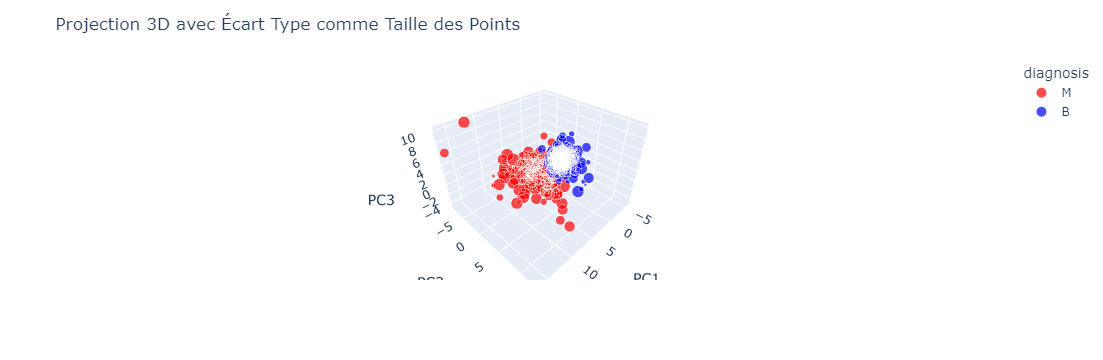

In [224]:
import plotly.express as px

# Supposons que 'df_pca_4' est votre DataFrame contenant les 4 premières composantes principales et 'diagnosis'
# Ajoutons une colonne représentant une mesure statistique, par exemple l'écart type des caractéristiques originales pour chaque observation
# Pour cet exemple, nous allons simuler cette mesure statistique par une colonne aléatoire, remplacez ceci par votre propre calcul
import numpy as np
df_pca_4['Deviation'] = np.random.rand(len(df_pca_4))  # Exemple de mesure statistique

# Création d'un graphique 3D interactif avec Plotly
fig = px.scatter_3d(df_pca_4, x='PC1', y='PC2', z='PC3', color='diagnosis', size='Deviation', 
                    color_discrete_map={'B': 'blue', 'M': 'red'},
                    labels={'PC1': 'PC1', 'PC2': 'PC2', 'PC3': 'PC3', 'Deviation': 'Écart Type'})

fig.update_layout(title='Projection 3D avec Écart Type comme Taille des Points',
                  scene=dict(xaxis_title='PC1',
                             yaxis_title='PC2',
                             zaxis_title='PC3'))
fig.show()


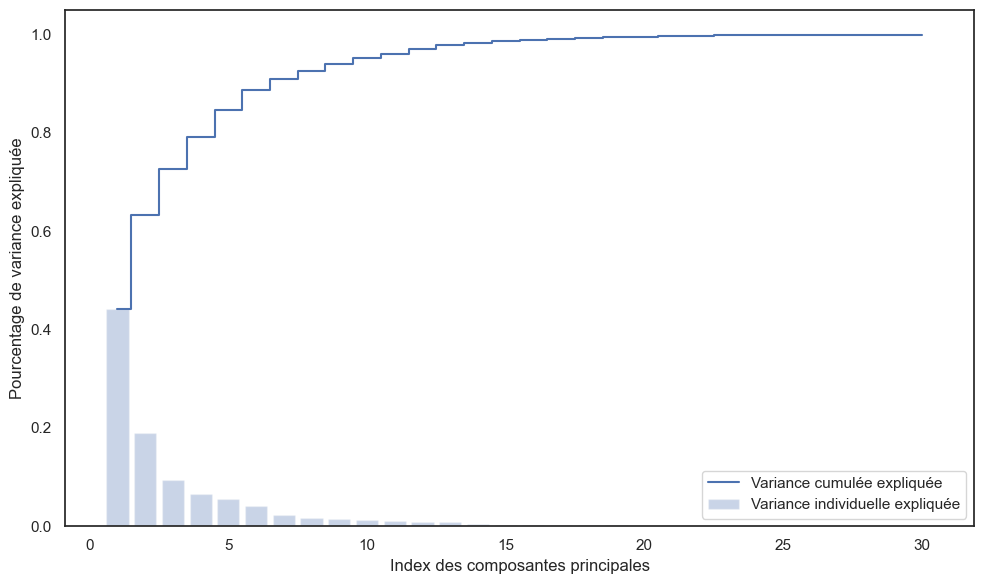

In [238]:
# Application de l'ACP sans réduire le nombre de composantes :
                    # Cela signifie que le nombre de composantes sera égal au nombre de caractéristiques originales
pca = PCA()
pca.fit(data_standardisee)

# Calcul de la variance  et de la variance 
variance_expliquee = pca.explained_variance_ratio_
variance_cumulee = pca.explained_variance_ratio_.cumsum()

# Création du scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variance_expliquee) + 1), variance_expliquee, alpha=0.3, align='center', label='Variance individuelle expliquée')
plt.step(range(1, len(variance_cumulee) + 1), variance_cumulee, where='mid', label='Variance cumulée expliquée')
plt.ylabel('Pourcentage de variance expliquée')
plt.xlabel('Index des composantes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [239]:
# Application de l'ACP
pca = PCA().fit(data_standardisee)
# Calcul de la variance cumulée expliquée
variance_cumulee = np.cumsum(pca.explained_variance_ratio_)
# Détermination du nombre de composantes nécessaires pour atteindre différents seuils de variance expliquée
seuils = [0.8, 0.9, 0.95,0.99]
n_composantes_pour_seuil = {seuil: np.argmax(variance_cumulee >= seuil) + 1 for seuil in seuils}
print("Nombre de composantes principales nécessaires pour atteindre :")
for seuil, n_composantes in n_composantes_pour_seuil.items():
    print(f" - {seuil*100}% de la variance expliquée: {n_composantes} composantes principales")

Nombre de composantes principales nécessaires pour atteindre :
 - 80.0% de la variance expliquée: 5 composantes principales
 - 90.0% de la variance expliquée: 7 composantes principales
 - 95.0% de la variance expliquée: 10 composantes principales
 - 99.0% de la variance expliquée: 17 composantes principales


5 composantes principales sont nécessaires pour expliquer 80% de la variance totale.
7 composantes principales sont nécessaires pour expliquer 90% de la variance totale.
10 composantes principales sont nécessaires pour expliquer 95% de la variance total.
17 composantes principales sont nécessaires pour expliquer 99% de la variance total

In [240]:
# Application de l'ACP en spécifiant # 10 ou 17 composantes principales
pca = PCA(n_components=10)
pca_resultat = pca.fit_transform(data_standardisee)

# Création d'un DataFrame pour les résultats de l'ACP
colonnes_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
df_pca = pd.DataFrame(data=pca_resultat, columns=colonnes_pca)


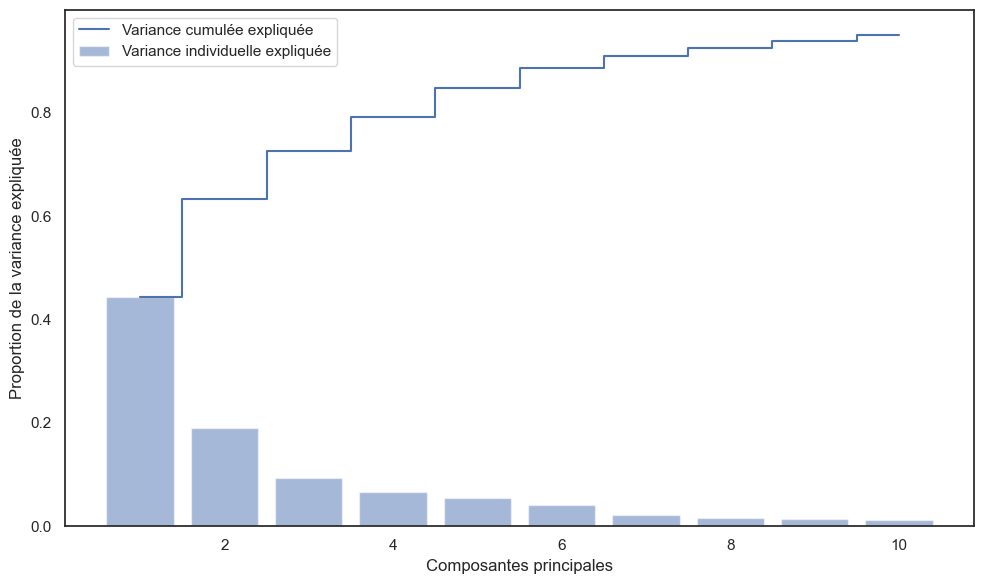

In [241]:
import matplotlib.pyplot as plt

# Assuming `pca` is your PCA object
explained_var_ratio = pca.explained_variance_ratio_
num_components = len(explained_var_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, num_components + 1), explained_var_ratio, alpha=0.5, align='center', label='Variance individuelle expliquée')
plt.step(range(1, num_components + 1), explained_var_ratio.cumsum(), where='mid', label='Variance cumulée expliquée')
plt.ylabel('Proportion de la variance expliquée')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


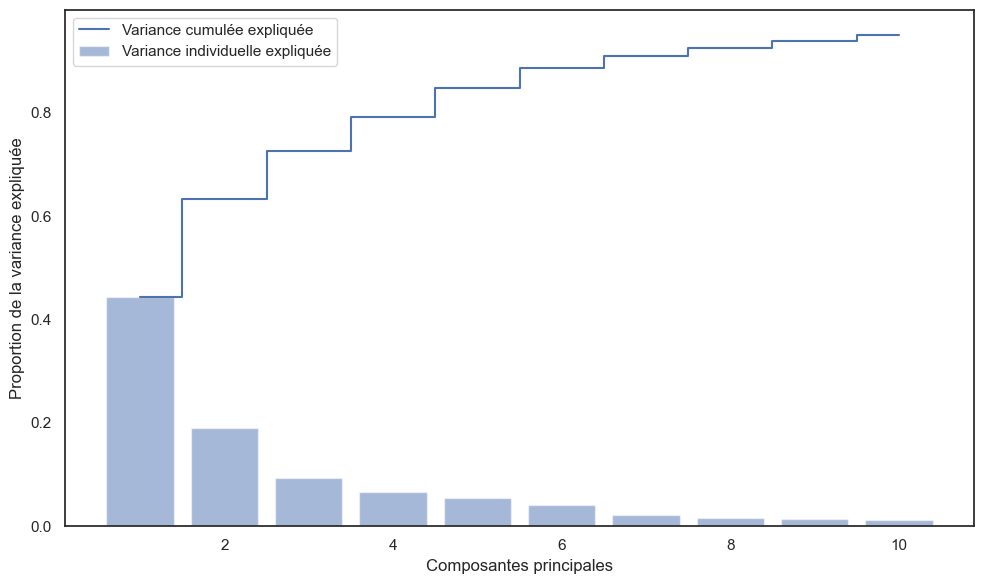

In [242]:
# Visualisation de la variance expliquée par chaque composante principale
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Variance individuelle expliquée')
plt.step(range(1, 11), pca.explained_variance_ratio_.cumsum(), where='mid', label='Variance cumulée expliquée')
plt.ylabel('Proportion de la variance expliquée')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

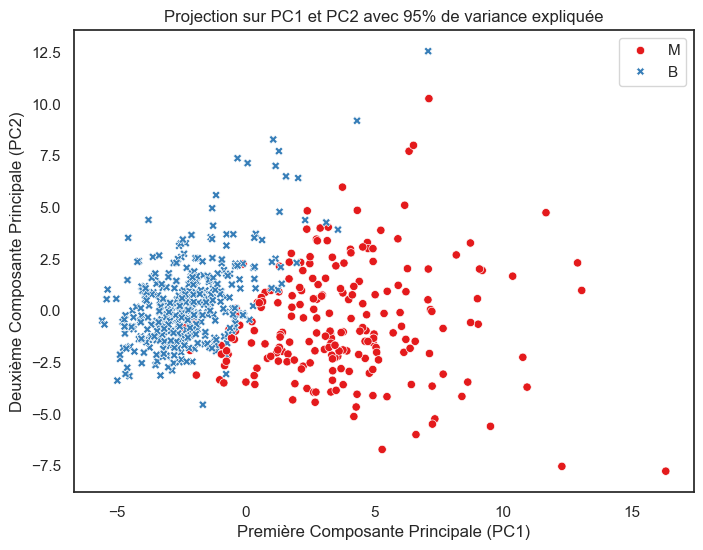

In [243]:
# Supposons que 'data_standardisee' est votre DataFrame standardisé et 'label' contient les étiquettes de diagnostic
pca = PCA(n_components=10)
pca_resultat = pca.fit_transform(data_standardisee)

# Création d'un DataFrame pour les résultats de l'ACP
colonnes_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
df_pca = pd.DataFrame(data=pca_resultat, columns=colonnes_pca)

# Ajout des étiquettes de diagnostic au DataFrame df_pca
# Assurez-vous que 'label' contient les étiquettes de diagnostic correspondantes aux observations dans 'data_standardisee'
df_pca['diagnosis'] = label

# Maintenant, df_pca contient les résultats de l'ACP et les étiquettes de diagnostic, donc vous pouvez créer le graphique
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='diagnosis', style='diagnosis', palette='Set1')
plt.title('Projection sur PC1 et PC2 avec 95% de variance expliquée')
plt.xlabel('Première Composante Principale (PC1)')
plt.ylabel('Deuxième Composante Principale (PC2)')
plt.legend(loc='best')
plt.show()


## MODELE :

Choix du Modèle : 
RandomForest est un bon choix initial pour de nombreux problèmes de classification en raison de sa robustesse et de sa facilité d'utilisation. 
d'autres modèles comme les SVM, la régression logistique, ou les réseaux de neurones pourraient être plus appropriés.

Validation Croisée : Pour une évaluation plus robuste, envisagez d'utiliser la validation croisée au lieu d'une simple division apprentissage/test.

Optimisation des Hyperparamètres : Utilisez des techniques telles que la recherche sur grille (GridSearchCV) ou la recherche aléatoire (RandomizedSearchCV) pour trouver les meilleurs hyperparamètres pour votre modèle.

Interprétation des Résultats : Outre la précision, examinez d'autres métriques pertinentes telles que le rappel, la précision, le score F1, et l'AUC, surtout pour les jeux de données déséquilibrés.

Ce travaille  illustre comment procéder à une classification après une réduction de dimensionnalité via l'ACP. Adapter et optimiser ces étapes à votre contexte spécifique peut améliorer la performance de votre modèle de classification.

In [244]:
# Préparation des données pour la modélisation
# 'df_pca' est votre DataFrame contenant les composantes principales et les étiquettes 'diagnosis'
X = df_pca.drop('diagnosis', axis=1)  # Caractéristiques : composantes principales
y = df_pca['diagnosis']  # Étiquettes

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création et entraînement du modèle RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy)
print("Rapport de classification :\n", classification_report(y_test, y_pred))


Précision : 0.9532163742690059
Rapport de classification :
               precision    recall  f1-score   support

           B       0.96      0.96      0.96       108
           M       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Les résultats obtenus montrent une excellente performance de votre modèle de classification RandomForest sur l'ensemble de test :

Précision globale (Accuracy) : Le modèle a correctement prédit environ 95.3% des cas. Cela indique que le modèle est très performant pour distinguer entre les diagnostics de cancer du sein (M pour malin et B pour bénin).

Précision (Precision) : Pour les cas bénins (B), la précision est de 96%, et pour les cas malins (M), elle est de 94%. 

La précision mesure la proportion des identifications positives qui étaient effectivement correctes. Des valeurs élevées indiquent que le modèle est très fiable lorsqu'il prédit une classe spécifique.

Rappel (Recall) : Le rappel est également de 96% pour les cas bénins et de 94% pour les cas malins. 
Le rappel mesure la proportion des cas positifs réels qui ont été correctement identifiés. Des valeurs élevées suggèrent que le modèle est capable de détecter la majorité des cas réels pour chaque classe.

Score F1 : Le score F1 pour les deux classes est très proche de la précision et du rappel, indiquant un bon équilibre entre ces deux métriques. Le score F1 est une moyenne harmonique de la précision et du rappel, offrant une mesure de la précision et de la robustesse du modèle.

Interprétation et Prochaines Étapes :
Performance Élevée : Ces résultats suggèrent que l'ACP, suivie de la classification par RandomForest, est une approche très efficace pour ce problème de diagnostic du cancer du sein. Le modèle performe bien à la fois en termes de capacité à identifier correctement les cas (précision) et en termes de sensibilité à détecter les cas positifs (rappel).

Équilibre des Classes : Les scores relativement équilibrés entre les classes B et M indiquent que le modèle gère bien les deux types de diagnostics, malgré les différences dans leur prévalence.

Validation et Optimisation : Bien que les résultats soient prometteurs, il est important de valider la performance du modèle sur des ensembles de données externes ou via des techniques de validation croisée pour s'assurer que les résultats ne sont pas spécifiques à la manière dont l'ensemble de données a été divisé.

Exploration d'Autres Modèles : Même si RandomForest a montré de bonnes performances, explorer d'autres modèles de classification et comparer leurs résultats pourrait révéler des approches encore plus efficaces.

Ajustement des Hyperparamètres : Pour optimiser davantage la performance, considérez l'ajustement des hyperparamètres du modèle RandomForest ou des modèles alternatifs que vous pourriez tester.

En résumé, les résultats obtenus sont très encourageants et démontrent l'efficacité de votre approche pour la classification des diagnostics de cancer du sein. La continuation de l'optimisation du modèle et la validation de sa performance sont des étapes clés pour confirmer sa fiabilité et son applicabilité pratique.

### Matrice de Confusion :
La matrice de confusion montre les prédictions correctes et incorrectes de votre modèle dans un format tabulaire.

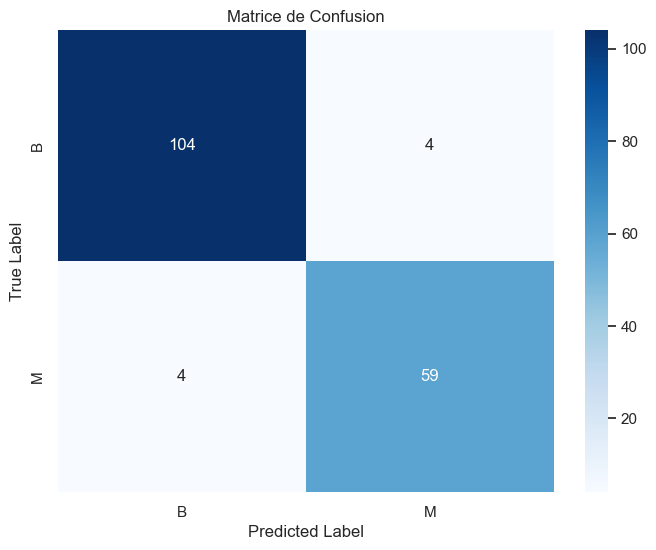

In [245]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion')
plt.show()


## Courbe ROC et AUC
La courbe Receiver Operating Characteristic (ROC) et l'Area Under the Curve (AUC) évaluent la performance du modèle à différents seuils de classification. Pour des problèmes multiclasse, vous pouvez visualiser la courbe ROC pour chaque classe ou calculer un score AUC macro/micro moyen.

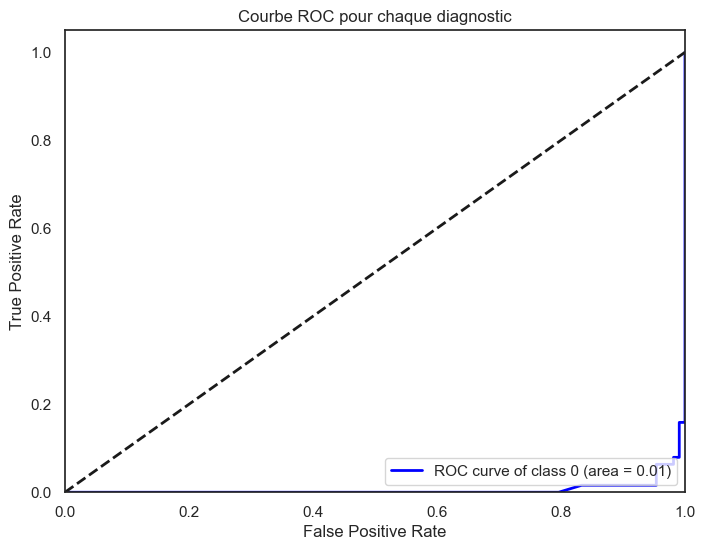

In [159]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

# Binarisation des étiquettes pour le calcul de l'AUC
y_bin = label_binarize(y, classes=['B', 'M'])
n_classes = y_bin.shape[1]

# Calcul des scores de probabilité
y_prob = model.predict_proba(X_test)

# Calcul de la courbe ROC et de l'AUC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label='M')
    roc_auc[i] = auc(fpr[i], tpr[i])

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC pour chaque diagnostic')
plt.legend(loc="lower right")
plt.show()


Importance des Caractéristiques
L'importance des caractéristiques montre quelles composantes principales ont le plus contribué à la décision du modèle.

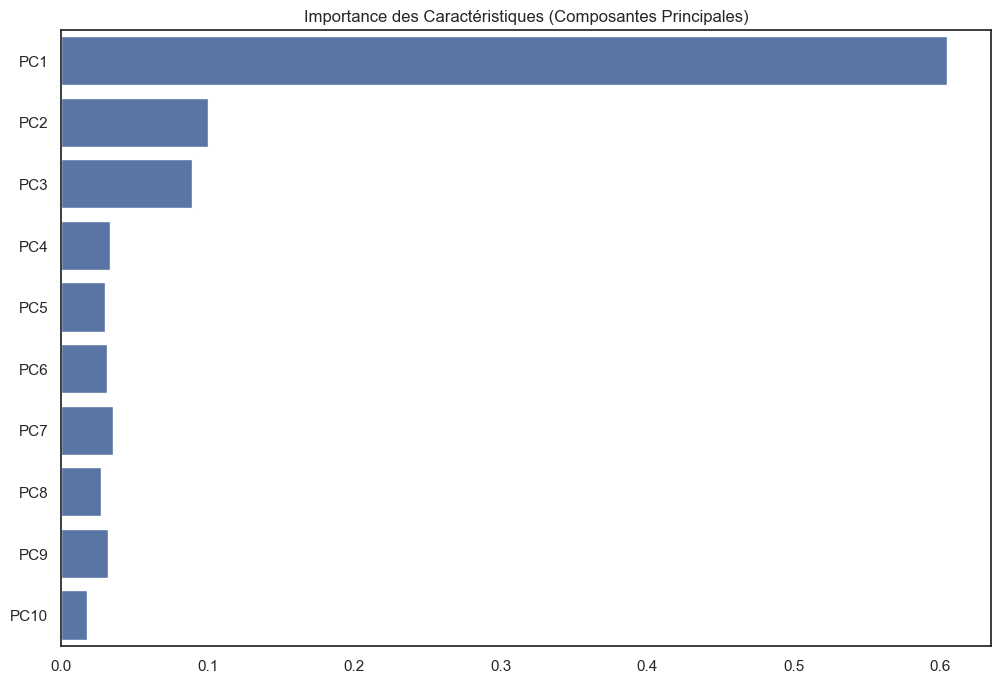

In [160]:
feature_importances = model.feature_importances_
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=colonnes_pca)
plt.title('Importance des Caractéristiques (Composantes Principales)')
plt.show()


Dans l'analyse  de l'Analyse en Composantes Principales (ACP ou PCA en anglais) a transformé les variables originales en un nouveau jeu de variables, qui sont les composantes principales (PCs). Ces composantes ne correspondent pas directement à une seule variable originale mais sont plutôt des combinaisons linéaires de toutes les variables originales.

Cela signifie que chaque composante principale peut être influencée par plusieurs variables originales à des degrés divers.

Pour comprendre quelles variables originales ont le plus contribué à chaque composante principale retenue pour le modèle,


je peux  examiner les "loadings" de l'ACP. Les loadings indiquent la contribution de chaque variable originale à chaque composante principale. Ils sont obtenus en examinant les vecteurs propres (eigenvectors) de la matrice de covariance/corrélation utilisée dans l'ACP.

Voici comment je peux  afficher les loadings pour chaque composante principale :

In [161]:
# Les vecteurs propres sont accessibles via pca.components_ après avoir ajusté l'ACP
loadings = pca.components_

# Création d'un DataFrame pour les loadings avec des variables originales comme colonnes
df_loadings = pd.DataFrame(loadings.T, index=df_numerique.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Affichage des loadings pour les premières composantes principales
print(df_loadings)


                              PC1       PC2       PC3       PC4       PC5  \
radius_mean              0.218902 -0.233857 -0.008531  0.041409  0.037786   
texture_mean             0.103725 -0.059706  0.064550 -0.603050 -0.049469   
perimeter_mean           0.227537 -0.215181 -0.009314  0.041983  0.037375   
area_mean                0.220995 -0.231077  0.028700  0.053434  0.010331   
smoothness_mean          0.142590  0.186113 -0.104292  0.159383 -0.365089   
compactness_mean         0.239285  0.151892 -0.074092  0.031795  0.011704   
concavity_mean           0.258400  0.060165  0.002734  0.019123  0.086375   
concave points_mean      0.260854 -0.034768 -0.025564  0.065336 -0.043861   
symmetry_mean            0.138167  0.190349 -0.040240  0.067125 -0.305941   
fractal_dimension_mean   0.064363  0.366575 -0.022574  0.048587 -0.044424   
radius_se                0.205979 -0.105552  0.268481  0.097941 -0.154456   
texture_se               0.017428  0.089980  0.374634 -0.359856 -0.191651   

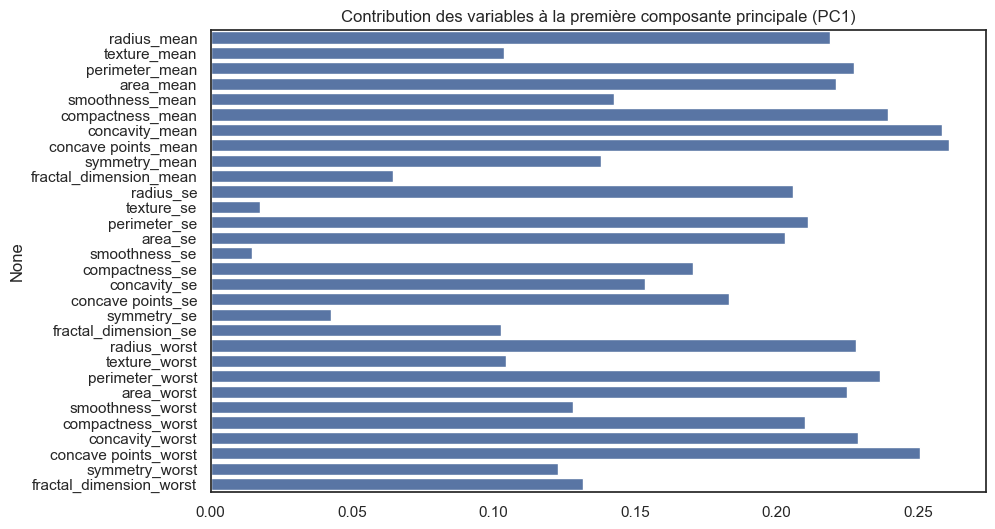

In [162]:
# Exemple pour visualiser les contributions à PC1
plt.figure(figsize=(10, 6))
sns.barplot(x=df_loadings['PC1'].values, y=df_loadings.index)
plt.title('Contribution des variables à la première composante principale (PC1)')
plt.show()


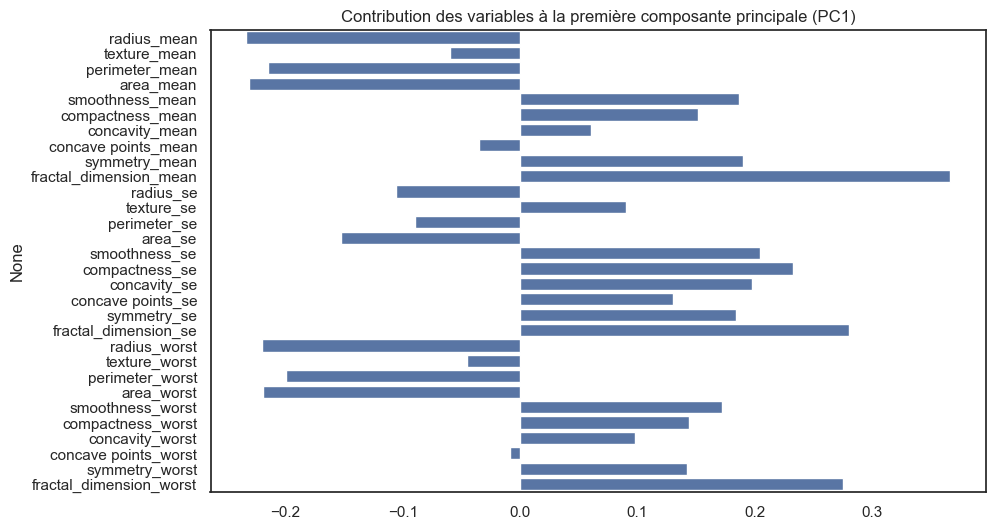

In [163]:
# Exemple pour visualiser les contributions à PC1
plt.figure(figsize=(10, 6))
sns.barplot(x=df_loadings['PC'].values, y=df_loadings.index)
plt.title('Contribution des variables à la première composante principale (PC1)')
plt.show()


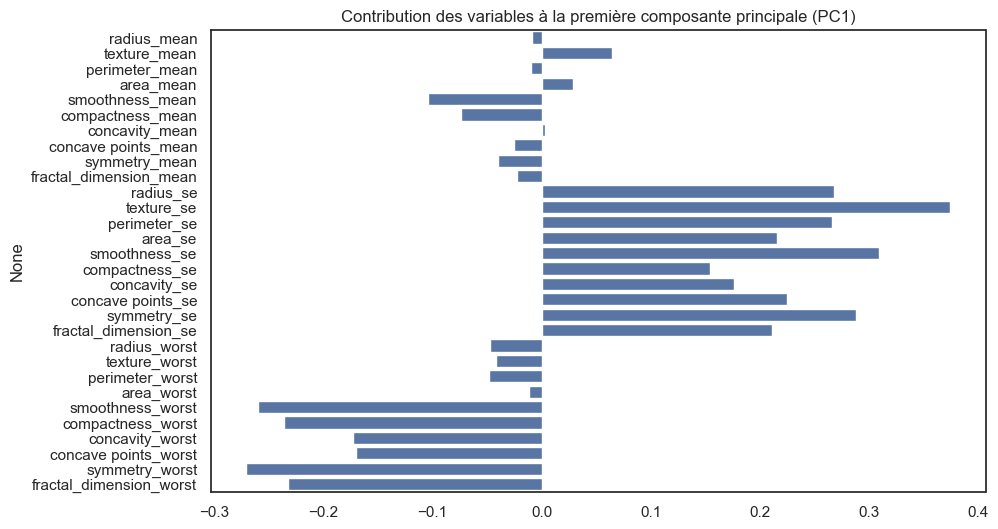

In [164]:
# Exemple pour visualiser les contributions à PC1
plt.figure(figsize=(10, 6))
sns.barplot(x=df_loadings['PC3'].values, y=df_loadings.index)
plt.title('Contribution des variables à la première composante principale (PC1)')
plt.show()


 # Régression Logistique

In [167]:
from sklearn.linear_model import LogisticRegression

# Création et entraînement du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Évaluation du modèle
y_pred_logistic = logistic_model.predict(X_test)
print("Précision Régression Logistique :", accuracy_score(y_test, y_pred_logistic))


Précision Régression Logistique : 0.9824561403508771


# Support Vector Machine (SVM)

In [168]:
from sklearn.svm import SVC

# Création et entraînement du modèle SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Évaluation du modèle
y_pred_svm = svm_model.predict(X_test)
print("Précision SVM :", accuracy_score(y_test, y_pred_svm))


Précision SVM : 0.9824561403508771


# Réseaux de Neurones (Perceptron Multi-Couches)

In [169]:
from sklearn.neural_network import MLPClassifier

# Création et entraînement du modèle MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_model.fit(X_train, y_train)

# Évaluation du modèle
y_pred_mlp = mlp_model.predict(X_test)
print("Précision MLP :", accuracy_score(y_test, y_pred_mlp))


Précision MLP : 0.9766081871345029


# Gradient Boosting Machines

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

# Création et entraînement du modèle Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Évaluation du modèle
y_pred_gb = gb_model.predict(X_test)
print("Précision Gradient Boosting :", accuracy_score(y_test, y_pred_gb))


Précision Gradient Boosting : 0.9766081871345029


In [171]:
# from sklearn.metrics import accuracy_score, f1_score

# # Supposons que y_test est votre ensemble de test réel et que y_pred_model1 et y_pred_model2 sont les prédictions de deux modèles différents
# accuracy_model1 = accuracy_score(y_test, y_pred_model1)
# f1_model1 = f1_score(y_test, y_pred_model1, average='weighted')

# accuracy_model2 = accuracy_score(y_test, y_pred_model2)
# f1_model2 = f1_score(y_test, y_pred_model2, average='weighted')

# print(f"Modèle 1 - Précision: {accuracy_model1}, Score F1: {f1_model1}")
# print(f"Modèle 2 - Précision: {accuracy_model2}, Score F1: {f1_model2}")


NameError: name 'y_pred_model1' is not defined

<div style="border:5px solid black; padding:5px;">
    <h1>ETAPE 3</h1>
    <p>Nettoyage des Données:</p>
    </div>

In [ ]:
data.shape

Certaines colonnes peuvent ne pas être nécessaires pour mon  analyse. (ID, ou des colonnes avec trop de valeurs manquantes)

In [ ]:
data = data.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

In [ ]:
afficher_info_data(data)

In [ ]:
data.dropna(inplace=True)  # Supprime les lignes avec des valeurs manquantes
#ici aucun lingne qui presente des valeurs manquantes

In [ ]:
afficher_info_data(data)

In [ ]:
colonnes_a_supprimer = ['diagnosis']
features = data.drop(columns=colonnes_a_supprimer)
# print the number of  Malignant and Benign
diagnosis=data['diagnosis']
diagnosis

In [ ]:
print(type(diagnosis))
print(diagnosis.dtype)

In [ ]:
afficher_info_data(data)


In [ ]:
afficher_info_data(features)


In [ ]:
diagnosis.shape

In [ ]:
diagnosis.tail


<div style="border:5px solid black; padding:5px;">
    <h1>ETAPE 4</h1>
    <p>Analyse Exploratoire des Données (AED)</p>
    </div>

In [ ]:
diagnosis_data = pd.DataFrame({'diagnosis': diagnosis})
# Remplacer les valeurs de classe par 0 et 1
diagnosis_data['diagnosis'] = diagnosis_data['diagnosis'].map({'M': 0, 'B': 1}) 
# Afficher le DataFrame modifié
print(diagnosis_data)


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Initialiser le StandardScaler
scaler = StandardScaler()

# Standardiser les caractéristiques
features_scaled = scaler.fit_transform(features)

# Convertir le résultat en DataFrame pour une utilisation ultérieure, si nécessaire
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
print(features_scaled_df.head())

In [ ]:
# Initialiser le StandardScaler
scaler = StandardScaler()

# Standardiser les caractéristiques
features_scaled = scaler.fit_transform(features)

# Convertir le résultat en DataFrame pour une utilisation ultérieure, si nécessaire
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
print(features_scaled_df)

In [ ]:

# Nombre de variables à afficher par ligne et par colonne dans le subplot
variables_per_row = 5
# Calculer le nombre total de lignes nécessaires dans le subplot
total_rows = len(columns) // variables_per_row + (1 if len(columns) % variables_per_row > 0 else 0)
# Créer les subplots
for i in range(total_rows):
    # Définir la taille du subplot
    fig, axs = plt.subplots(1, variables_per_row, figsize=(20, 5))
    
    # Itérer sur chaque variable de ce groupe
    for j in range(variables_per_row):
        # Calculer l'index de la variable actuelle
        index = i * variables_per_row + j
        
        # Vérifier si l'index est dans la plage du nombre de colonnes
        if index < len(columns):
            # Sélectionner la colonne
            col = columns[index]
            
            # Créer l'histogramme pour la colonne actuelle
            axs[j].hist(data[col].dropna(), bins=20, color='blue', edgecolor='black')
            axs[j].set_title(col)
        else:
            # Masquer les axes pour les subplots vides (si le nombre total de variables n'est pas un multiple de variables_per_row)
            axs[j].axis('off')
    
    # Afficher le groupe de subplots
    plt.tight_layout()
    plt.show()


In [ ]:
plt.figure(figsize=(15, 15))  # Ajuster la taille selon le besoin
sns.boxplot(data=data[['radius_mean', 'texture_mean']])
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Boîtes à moustaches pour Radius Mean et Texture Mean')
plt.show()


In [ ]:
plt.figure(figsize=(15, 15))  # Ajuster la taille selon le besoin
sns.boxplot(data=data[['perimeter_mean', 'area_mean']])
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Boîtes à moustaches pour perimeter_mean et area_mean')
plt.show()

In [ ]:
data.describe

In [ ]:
print(data.columns)


In [ ]:
# print the number of  Malignant and Benign
data_diagnosis=diagnosis_data.value_counts().reset_index()
data_diagnosis

In [ ]:
import plotly.express as px

# Supposons que data_diagnosis est votre DataFrame avec les colonnes 'diagnosis' et 'count'
fig = px.bar(data_diagnosis, x='diagnosis', y='count', title='Nombre de cas Malins vs Bénins', text='count')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

In [ ]:
def describe_perso(data, include='all'):
    
    if include != 'all':
        data = data[include]
    
    # Préparation des données pour tabulate
    headers = ["", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
    rows = []
    
    for col in data.select_dtypes(include=[np.number]).columns:
        stats = data[col].describe()
        rows.append([col, stats['count'], stats['mean'], stats['std'], stats['min'],
                     stats['25%'], stats['50%'], stats['75%'], stats['max']])
    
    # Affichage du tableau
    print(tabulate(rows, headers=headers, tablefmt="grid", floatfmt=".2f"))
    
colonnes_a_supprimer = ['id','diagnosis', 'Unnamed: 32']
data_modifie = data.drop(columns=colonnes_a_supprimer)
# Maintenant, vous pouvez utiliser votre fonction describe_perso sur le DataFrame modifié
describe_perso(data_modifie)


$$
\text{Var}(X) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$
où N est le nombre total d'observations, Xi est chaque observation individuelle, et μ est la moyenne des observations.où 


In [ ]:
def calculer_variance(data):
    moyenne = sum(data) / len(data)
    somme_carres = sum((x - moyenne) ** 2 for x in data)
    variance = somme_carres / len(data)
    return variance
def afficher_variance_dataframe(data):
    headers = ["Colonne", "Variance"]
    rows = []
    
    for col in data.select_dtypes(include=[np.number]).columns:
        var_col = calculer_variance(data[col])
        rows.append([col, var_col])
    
    print(tabulate(rows, headers=headers, tablefmt="grid", floatfmt=".2f"))
    
afficher_variance_dataframe(data_modifie)

$$
\text{Cov}(X, Y) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_X)(y_i - \mu_Y)
$$


In [ ]:
def calculer_covariance(X, Y):
    if len(X) != len(Y):
        raise ValueError("X et Y doivent avoir le même nombre d'observations.")
    
    moyenne_X = sum(X) / len(X)
    moyenne_Y = sum(Y) / len(Y)
    
    covariance = sum((x - moyenne_X) * (y - moyenne_Y) for x, y in zip(X, Y)) / (len(X) - 1)
    return covariance
def afficher_matrice_covariance(data):
    # Calculer la matrice de covariance
    matrice_cov = data.cov()
    
    # Utiliser tabulate pour afficher la matrice de covariance
    print(tabulate(matrice_cov, headers=matrice_cov.columns, tablefmt="grid", floatfmt=".2f", showindex=True))
# Supposons que `data_modifie` soit votre DataFrame
afficher_matrice_covariance(data_modifie)


In [ ]:
def afficher_covariance(data):
    # Calcul de la matrice de covariance
    cov_matrix = data.cov()
    
    # Préparation des données pour tabulate
    headers = [""] + cov_matrix.columns.tolist()
    rows = []
    
    for row in cov_matrix.iterrows():
        rows.append([row[0]] + row[1].tolist())
    
    # Affichage du tableau
    print(tabulate(rows, headers=headers, tablefmt="grid", floatfmt=".2f"))
    
afficher_covariance(data_modifie)

In [ ]:
# Calculer la matrice de covariance pour le DataFrame modifié
matrice_cov = data_modifie.cov()

# Afficher le DataFrame de la matrice de covariance
matrice_cov
